# Import Labraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('carPrice_dataset.csv', index_col=0)
df

symboling                   CarName fueltype aspiration doornumber  \
car_ID                                                                       
1               3        alfa-romero giulia      gas        std        two   
2               3       alfa-romero stelvio      gas        std        two   
3               1  alfa-romero Quadrifoglio      gas        std        two   
4               2               audi 100 ls      gas        std       four   
5               2                audi 100ls      gas        std       four   
...           ...                       ...      ...        ...        ...   
201            -1           volvo 145e (sw)      gas        std       four   
202            -1               volvo 144ea      gas      turbo       four   
203            -1               volvo 244dl      gas        std       four   
204            -1                 volvo 246   diesel      turbo       four   
205            -1               volvo 264gl      gas      turbo       four   

            carbody drivewheel enginelocation  wheelbase  carlength  ...  \
car_ID                                                               ...   
1       convertible        rwd          front       88.6      168.8  ...   
2       convertible        rwd          front       88.6      168.8  ...   
3         hatchback        rwd          front       94.5      171.2  ...   
4             sedan        fwd          front       99.8      176.6  ...   
5             sedan        4wd          front       99.4      176.6  ...   
...             ...        ...            ...        ...        ...  ...   
201           sedan        rwd          front      109.1      188.8  ...   
202           sedan        rwd          front      109.1      188.8  ...   
203           sedan        rwd          front      109.1      188.8  ...   
204           sedan        rwd          front      109.1      188.8  ...   
205           sedan        rwd          front      109.1      188.8  ...   

        enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
car_ID                                                                          
1              130        mpfi       3.47   2.68              9.0         111   
2              130        mpfi       3.47   2.68              9.0         111   
3              152        mpfi       2.68   3.47              9.0         154   
4              109        mpfi       3.19   3.40             10.0         102   
5              136        mpfi       3.19   3.40              8.0         115   
...            ...         ...        ...    ...              ...         ...   
201            141        mpfi       3.78   3.15              9.5         114   
202            141        mpfi       3.78   3.15              8.7         160   
203            173        mpfi       3.58   2.87              8.8         134   
204            145         idi       3.01   3.40             23.0         106   
205            141        mpfi       3.78   3.15              9.5         114   

       peakrpm  citympg  highwaympg    price  
car_ID                                        
1         5000       21          27  13495.0  
2         5000       21          27  16500.0  
3         5000       19          26  16500.0  
4         5500       24          30  13950.0  
5         5500       18          22  17450.0  
...        ...      ...         ...      ...  
201       5400       23          28  16845.0  
202       5300       19          25  19045.0  
203       5500       18          23  21485.0  
204       4800       26          27  22470.0  
205       5400       19          25  22625.0  

[205 rows x 25 columns]

* Understanding of Data

In [4]:
df.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.select_dtypes(include = 'object')

CarName fueltype aspiration doornumber      carbody  \
car_ID                                                                         
1             alfa-romero giulia      gas        std        two  convertible   
2            alfa-romero stelvio      gas        std        two  convertible   
3       alfa-romero Quadrifoglio      gas        std        two    hatchback   
4                    audi 100 ls      gas        std       four        sedan   
5                     audi 100ls      gas        std       four        sedan   
...                          ...      ...        ...        ...          ...   
201              volvo 145e (sw)      gas        std       four        sedan   
202                  volvo 144ea      gas      turbo       four        sedan   
203                  volvo 244dl      gas        std       four        sedan   
204                    volvo 246   diesel      turbo       four        sedan   
205                  volvo 264gl      gas      turbo       four        sedan   

       drivewheel enginelocation enginetype cylindernumber fuelsystem  
car_ID                                                                 
1             rwd          front       dohc           four       mpfi  
2             rwd          front       dohc           four       mpfi  
3             rwd          front       ohcv            six       mpfi  
4             fwd          front        ohc           four       mpfi  
5             4wd          front        ohc           five       mpfi  
...           ...            ...        ...            ...        ...  
201           rwd          front        ohc           four       mpfi  
202           rwd          front        ohc           four       mpfi  
203           rwd          front       ohcv            six       mpfi  
204           rwd          front        ohc            six        idi  
205           rwd          front        ohc           four       mpfi  

[205 rows x 10 columns]

In [8]:
df.select_dtypes(include = ['int', 'float'])

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
car_ID                                                                     
1               3       88.6      168.8      64.1       48.8        2548   
2               3       88.6      168.8      64.1       48.8        2548   
3               1       94.5      171.2      65.5       52.4        2823   
4               2       99.8      176.6      66.2       54.3        2337   
5               2       99.4      176.6      66.4       54.3        2824   
...           ...        ...        ...       ...        ...         ...   
201            -1      109.1      188.8      68.9       55.5        2952   
202            -1      109.1      188.8      68.8       55.5        3049   
203            -1      109.1      188.8      68.9       55.5        3012   
204            -1      109.1      188.8      68.9       55.5        3217   
205            -1      109.1      188.8      68.9       55.5        3062   

        enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
car_ID                                                                         
1              130       3.47    2.68               9.0         111     5000   
2              130       3.47    2.68               9.0         111     5000   
3              152       2.68    3.47               9.0         154     5000   
4              109       3.19    3.40              10.0         102     5500   
5              136       3.19    3.40               8.0         115     5500   
...            ...        ...     ...               ...         ...      ...   
201            141       3.78    3.15               9.5         114     5400   
202            141       3.78    3.15               8.7         160     5300   
203            173       3.58    2.87               8.8         134     5500   
204            145       3.01    3.40              23.0         106     4800   
205            141       3.78    3.15               9.5         114     5400   

        citympg  highwaympg    price  
car_ID                                
1            21          27  13495.0  
2            21          27  16500.0  
3            19          26  16500.0  
4            24          30  13950.0  
5            18          22  17450.0  
...         ...         ...      ...  
201          23          28  16845.0  
202          19          25  19045.0  
203          18          23  21485.0  
204          26          27  22470.0  
205          19          25  22625.0  

[205 rows x 15 columns]

In [9]:
company_name= df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(2,'CompanyName',company_name)

In [10]:
df.drop(columns= 'CarName', inplace = True)

In [11]:
df

symboling  CompanyName fueltype aspiration doornumber      carbody  \
car_ID                                                                       
1               3  alfa-romero      gas        std        two  convertible   
2               3  alfa-romero      gas        std        two  convertible   
3               1  alfa-romero      gas        std        two    hatchback   
4               2         audi      gas        std       four        sedan   
5               2         audi      gas        std       four        sedan   
...           ...          ...      ...        ...        ...          ...   
201            -1        volvo      gas        std       four        sedan   
202            -1        volvo      gas      turbo       four        sedan   
203            -1        volvo      gas        std       four        sedan   
204            -1        volvo   diesel      turbo       four        sedan   
205            -1        volvo      gas      turbo       four        sedan   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
1             rwd          front       88.6      168.8  ...         130   
2             rwd          front       88.6      168.8  ...         130   
3             rwd          front       94.5      171.2  ...         152   
4             fwd          front       99.8      176.6  ...         109   
5             4wd          front       99.4      176.6  ...         136   
...           ...            ...        ...        ...  ...         ...   
201           rwd          front      109.1      188.8  ...         141   
202           rwd          front      109.1      188.8  ...         141   
203           rwd          front      109.1      188.8  ...         173   
204           rwd          front      109.1      188.8  ...         145   
205           rwd          front      109.1      188.8  ...         141   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
1             mpfi       3.47   2.68              9.0         111    5000   
2             mpfi       3.47   2.68              9.0         111    5000   
3             mpfi       2.68   3.47              9.0         154    5000   
4             mpfi       3.19   3.40             10.0         102    5500   
5             mpfi       3.19   3.40              8.0         115    5500   
...            ...        ...    ...              ...         ...     ...   
201           mpfi       3.78   3.15              9.5         114    5400   
202           mpfi       3.78   3.15              8.7         160    5300   
203           mpfi       3.58   2.87              8.8         134    5500   
204            idi       3.01   3.40             23.0         106    4800   
205           mpfi       3.78   3.15              9.5         114    5400   

        citympg  highwaympg    price  
car_ID                                
1            21          27  13495.0  
2            21          27  16500.0  
3            19          26  16500.0  
4            24          30  13950.0  
5            18          22  17450.0  
...         ...         ...      ...  
201          23          28  16845.0  
202          19          25  19045.0  
203          18          23  21485.0  
204          26          27  22470.0  
205          19          25  22625.0  

[205 rows x 25 columns]

In [12]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
def replace(a,b):
    df['CompanyName'].replace(a,b, inplace=True)
    
replace('maxda','mazda')
replace('Nissan','nissan')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [14]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<Axes: ylabel='price'>

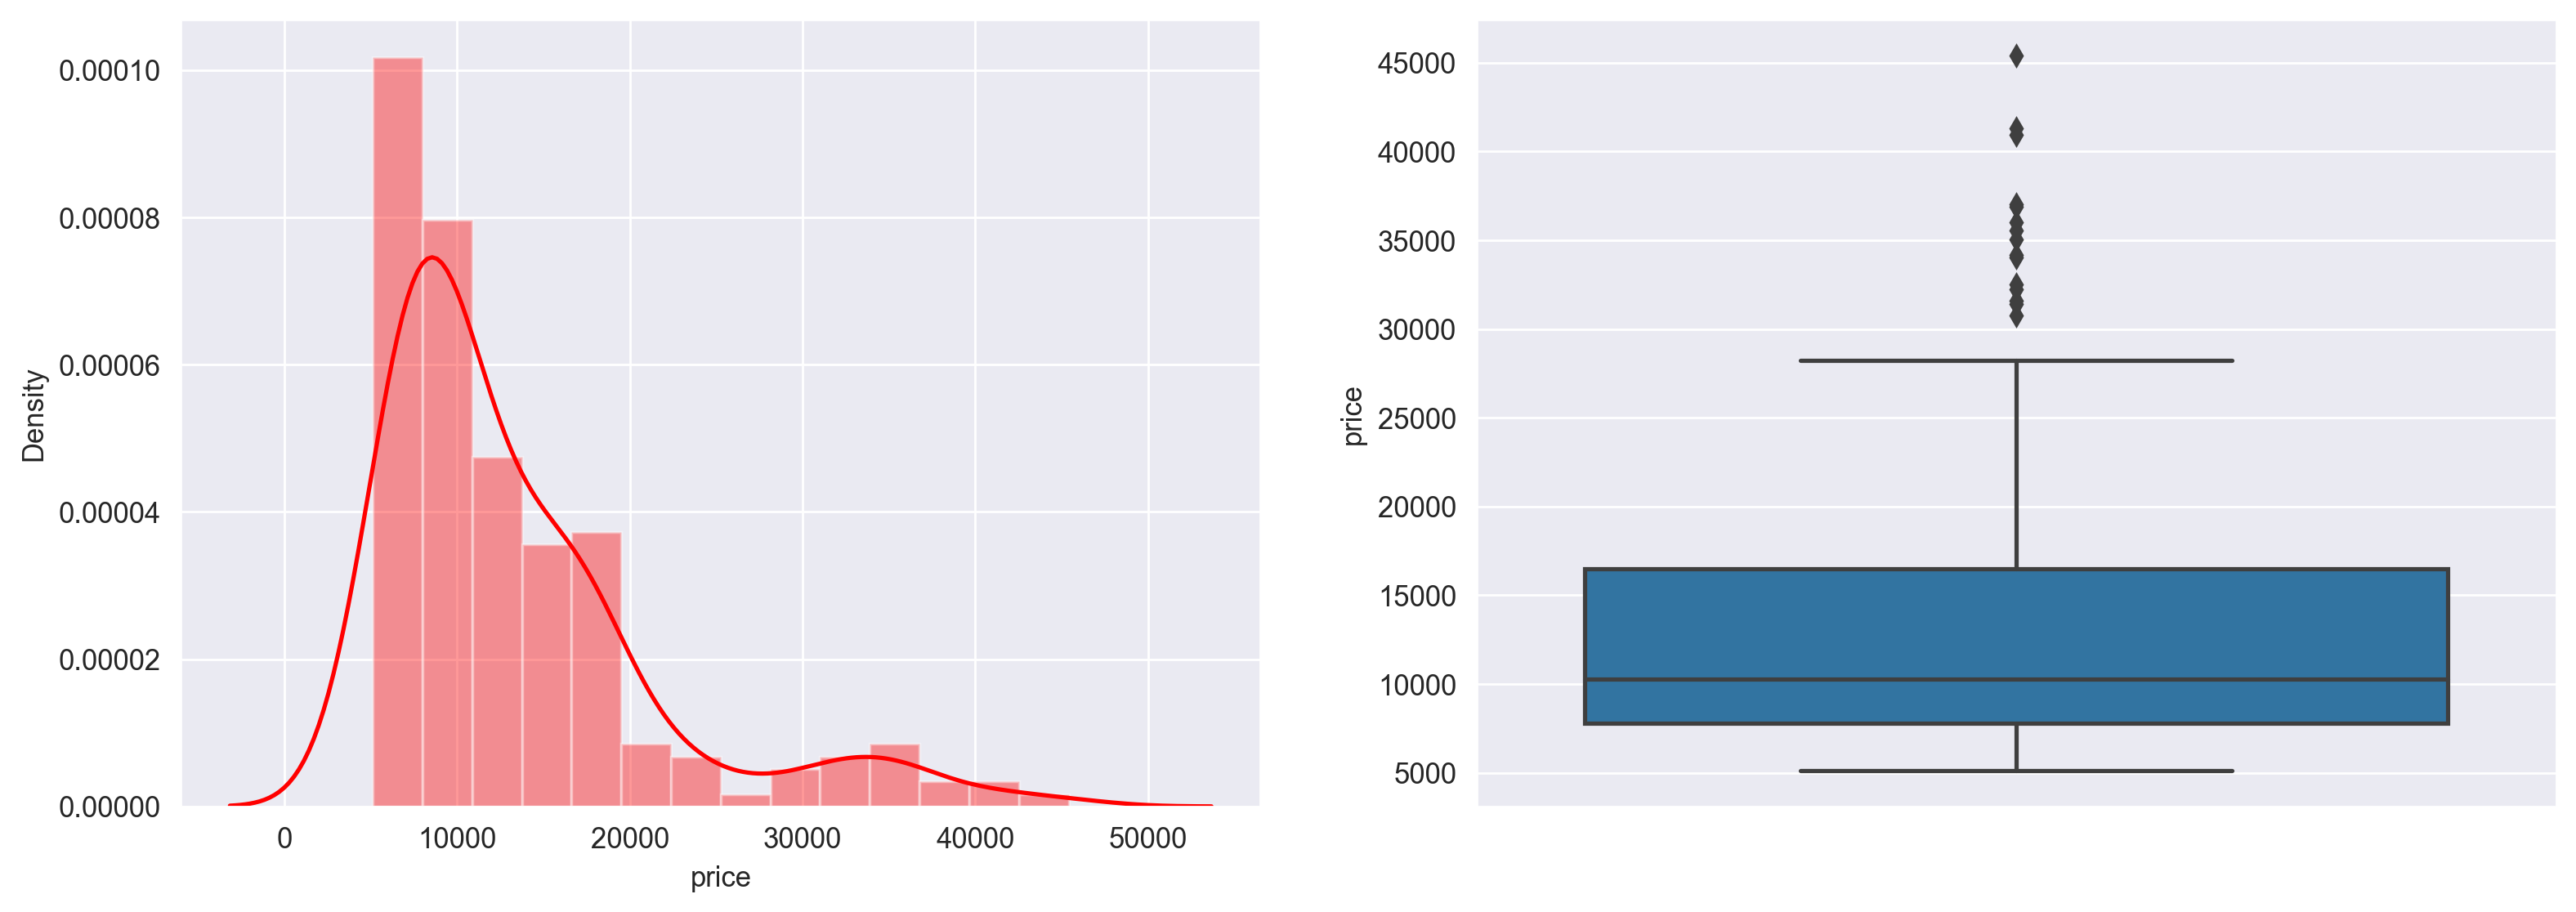

In [15]:
plt.subplot(1,2,1)
sns.distplot(df['price'], color = 'red',kde = True)

plt.subplot(1,2,2)
sns.boxplot(y = df['price'])

In [16]:
df['price'].agg(['mean','median','skew']).to_frame().T

mean   median      skew
price  13276.710571  10295.0  1.777678

1.Car price feature is Right Skewed.   
2.Most of the car price is below 14000.    
3.Outliers preset on the upper extreme side. 

- Visualizing Total number of cars sold by different company

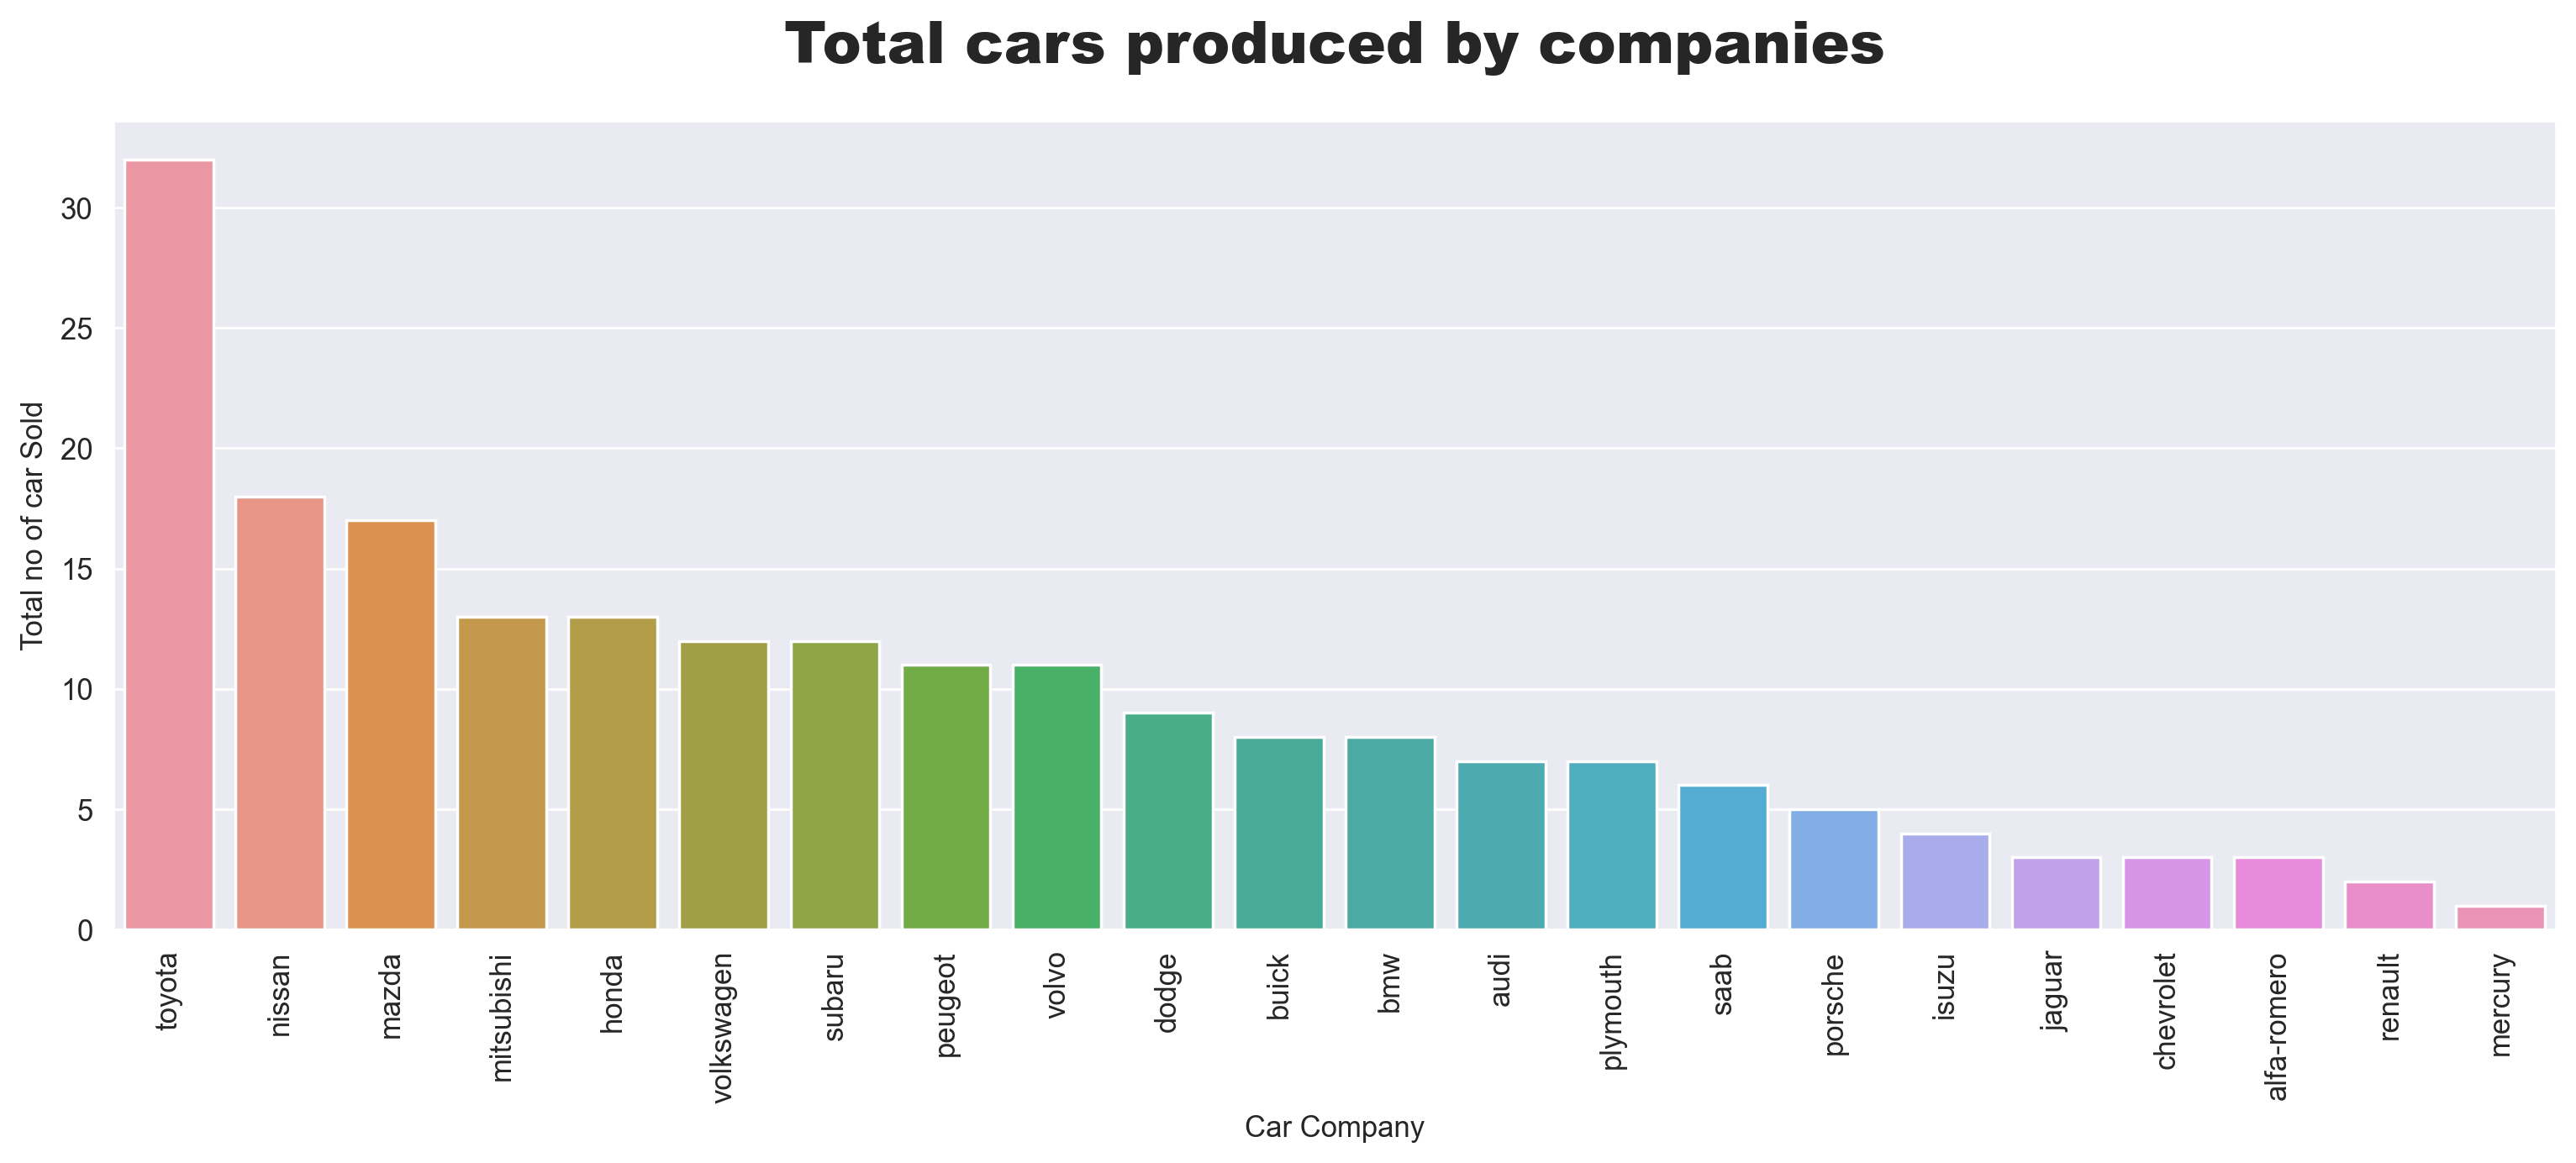

In [17]:
counts = df['CompanyName'].value_counts()  # total no of cars w.r.t company
sns.barplot(x=counts.index, y = counts.values)
plt.xticks(rotation = 90)
plt.xlabel('Car Company')
plt.ylabel('Total no of car Sold')
plt.title('Total cars produced by companies', pad=20, fontweight= 'black', fontsize=20)
plt.show()

In [18]:
df[df['CompanyName']=='mercury']

symboling CompanyName fueltype aspiration doornumber    carbody  \
car_ID                                                                    
76              1     mercury      gas      turbo        two  hatchback   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
76            rwd          front      102.7      178.4  ...         140   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
76            mpfi       3.78   3.12              8.0         175    5000   

        citympg  highwaympg    price  
car_ID                                
76           19          24  16503.0  

[1 rows x 25 columns]

In [19]:
df[df['CompanyName']=='renault']

symboling CompanyName fueltype aspiration doornumber    carbody  \
car_ID                                                                    
131             0     renault      gas        std       four      wagon   
132             2     renault      gas        std        two  hatchback   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
131           fwd          front       96.1      181.5  ...         132   
132           fwd          front       96.1      176.8  ...         132   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
131           mpfi       3.46    3.9              8.7          90    5100   
132           mpfi       3.46    3.9              8.7          90    5100   

        citympg  highwaympg   price  
car_ID                               
131          23          31  9295.0  
132          23          31  9895.0  

[2 rows x 25 columns]

1.Toyota company has sold highest number of cars    
2.Mercury and Renault has least number of car sold

- Visualizing Car Company w.r.t Price

In [20]:
x = pd.DataFrame(df.groupby('CompanyName')['price'].mean().sort_values(ascending = False))
x

price
CompanyName              
jaguar       34600.000000
buick        33647.000000
porsche      31400.500000
bmw          26118.750000
volvo        18063.181818
audi         17859.166714
mercury      16503.000000
alfa-romero  15498.333333
peugeot      15489.090909
saab         15223.333333
mazda        10652.882353
nissan       10415.666667
volkswagen   10077.500000
toyota        9885.812500
renault       9595.000000
mitsubishi    9239.769231
isuzu         8916.500000
subaru        8541.250000
honda         8184.692308
plymouth      7963.428571
dodge         7875.444444
chevrolet     6007.000000

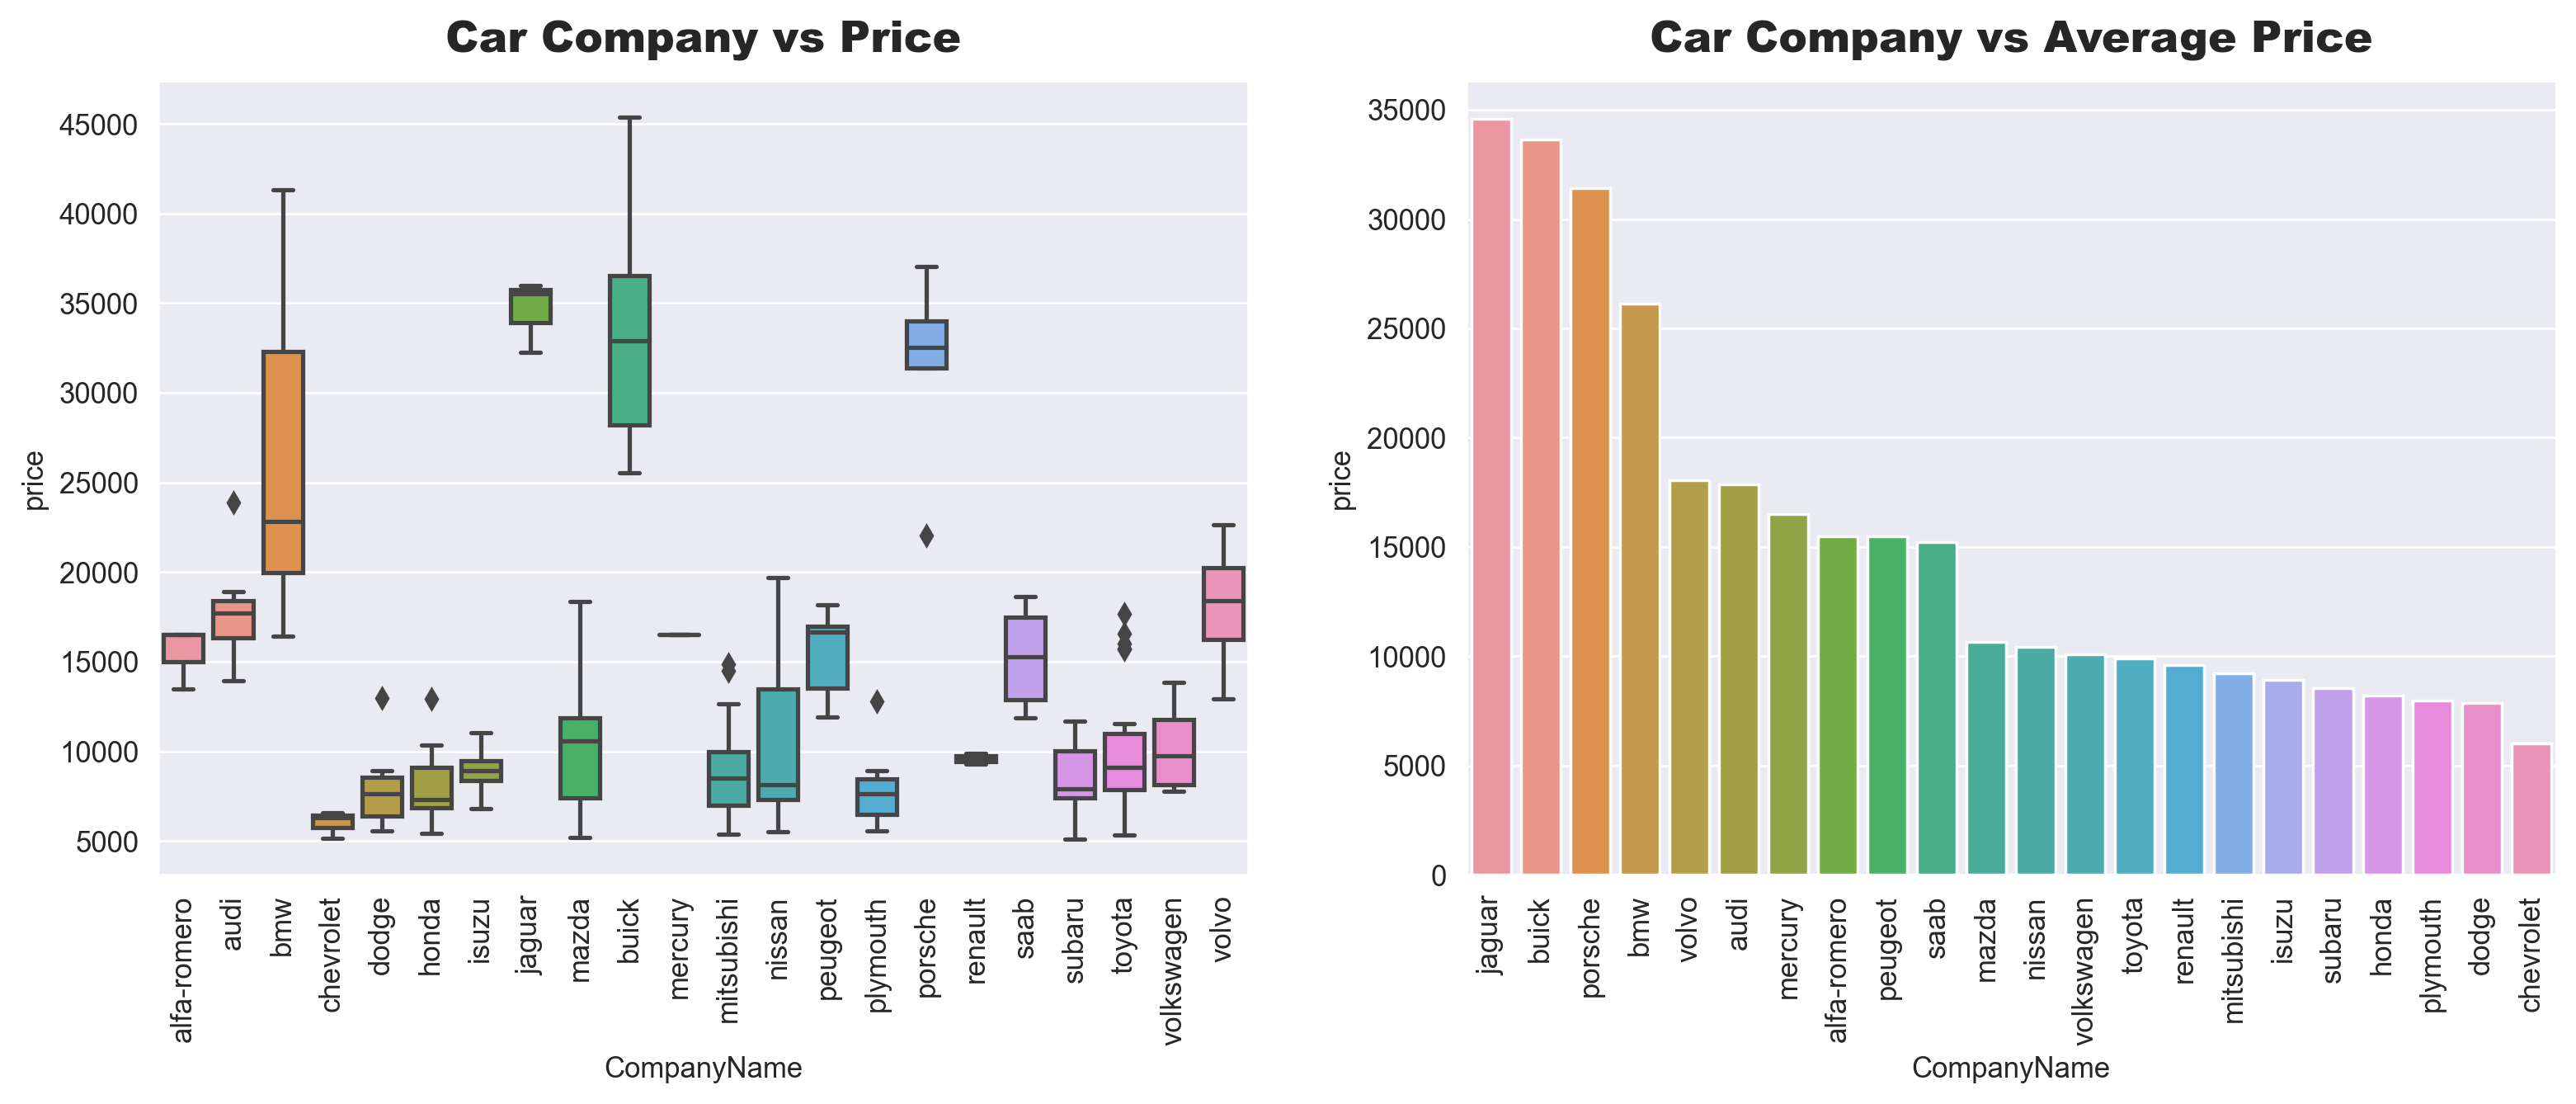

In [21]:
plt.subplot(1,2,1)
sns.boxplot(x = 'CompanyName', y = 'price', data = df)
plt.xticks(rotation = 90)
plt.title('Car Company vs Price', pad = 10, fontweight = 'black', fontsize = 15)

plt.subplot(1,2,2)
sns.barplot(x = x.index, y = 'price',data = x)
plt.xticks(rotation = 90)
plt.title('Car Company vs Average Price', pad = 10, fontweight = 'black', fontsize = 15)
plt.show()

1. Jaguar and buick seems to have the highest price range.

- Visualize Car Fuel Type Feature

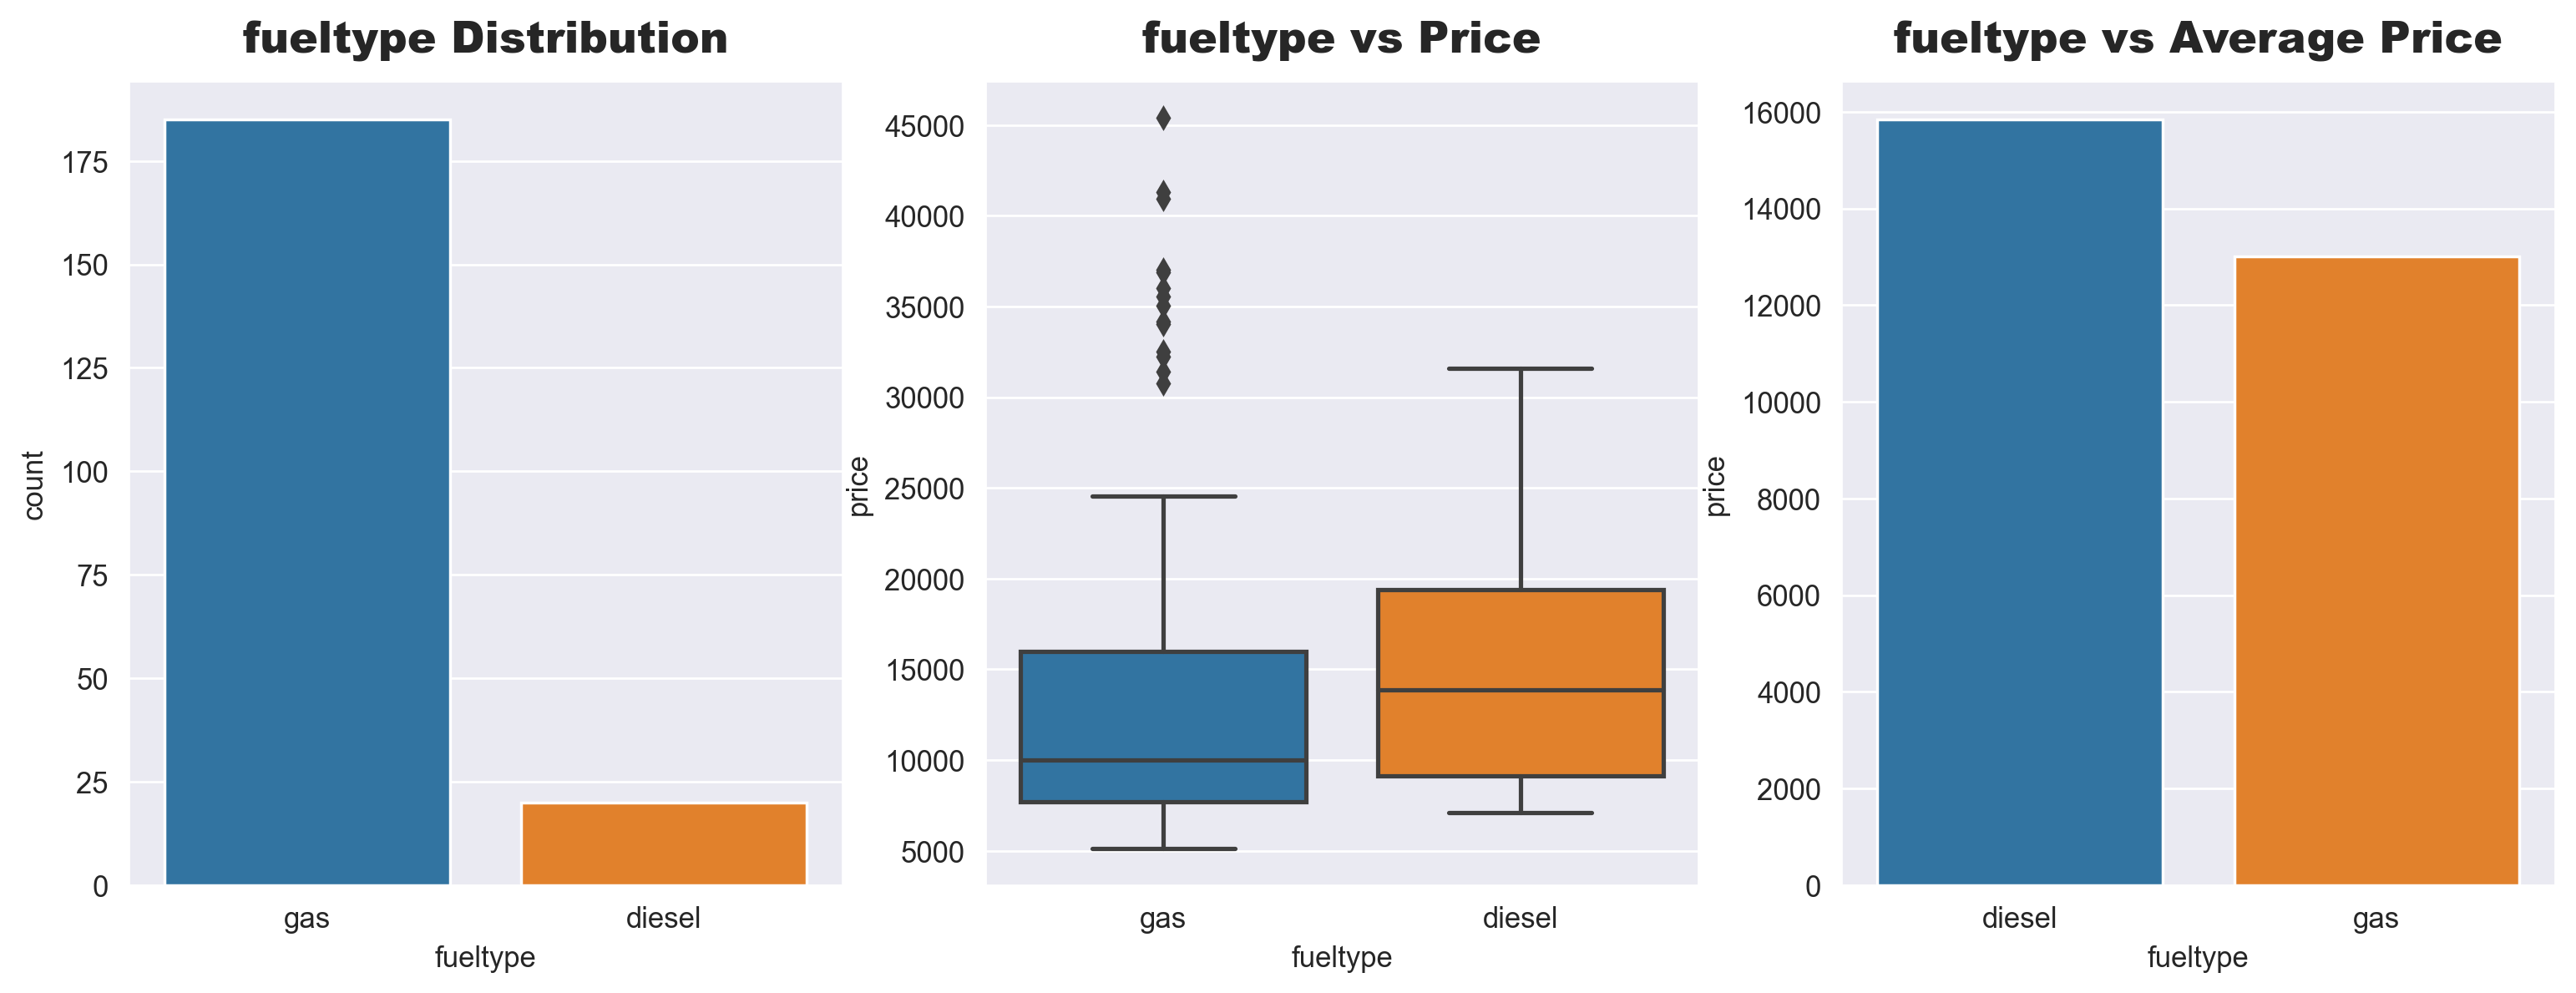

In [22]:
def categorical_vis(col):
    plt.subplot(1,3,1)
    sns.countplot(x = col,data = df)
    plt.title(f'{col} Distribution', pad = 10, fontweight = 'black', fontsize = 15)

    plt.subplot(1,3,2)
    sns.boxplot(x = col,y = 'price', data = df)
    plt.title(f'{col} vs Price', pad = 10, fontweight = 'black', fontsize = 15)

    plt.subplot(1,3,3)
    x = pd.DataFrame(df.groupby(col)['price'].mean().sort_values(ascending = False))
    sns.barplot(x = x.index, y = 'price', data = x)
    plt.title(f'{col} vs Average Price', pad = 10, fontweight = 'black', fontsize = 15)

categorical_vis('fueltype')

1. Cars having gas fuel is mostly sold
2. Gas fuel type cars are available in every price range
3. Average price of Gas fuel type is less than diesel fuel type

- Visualize Aspiration Feature

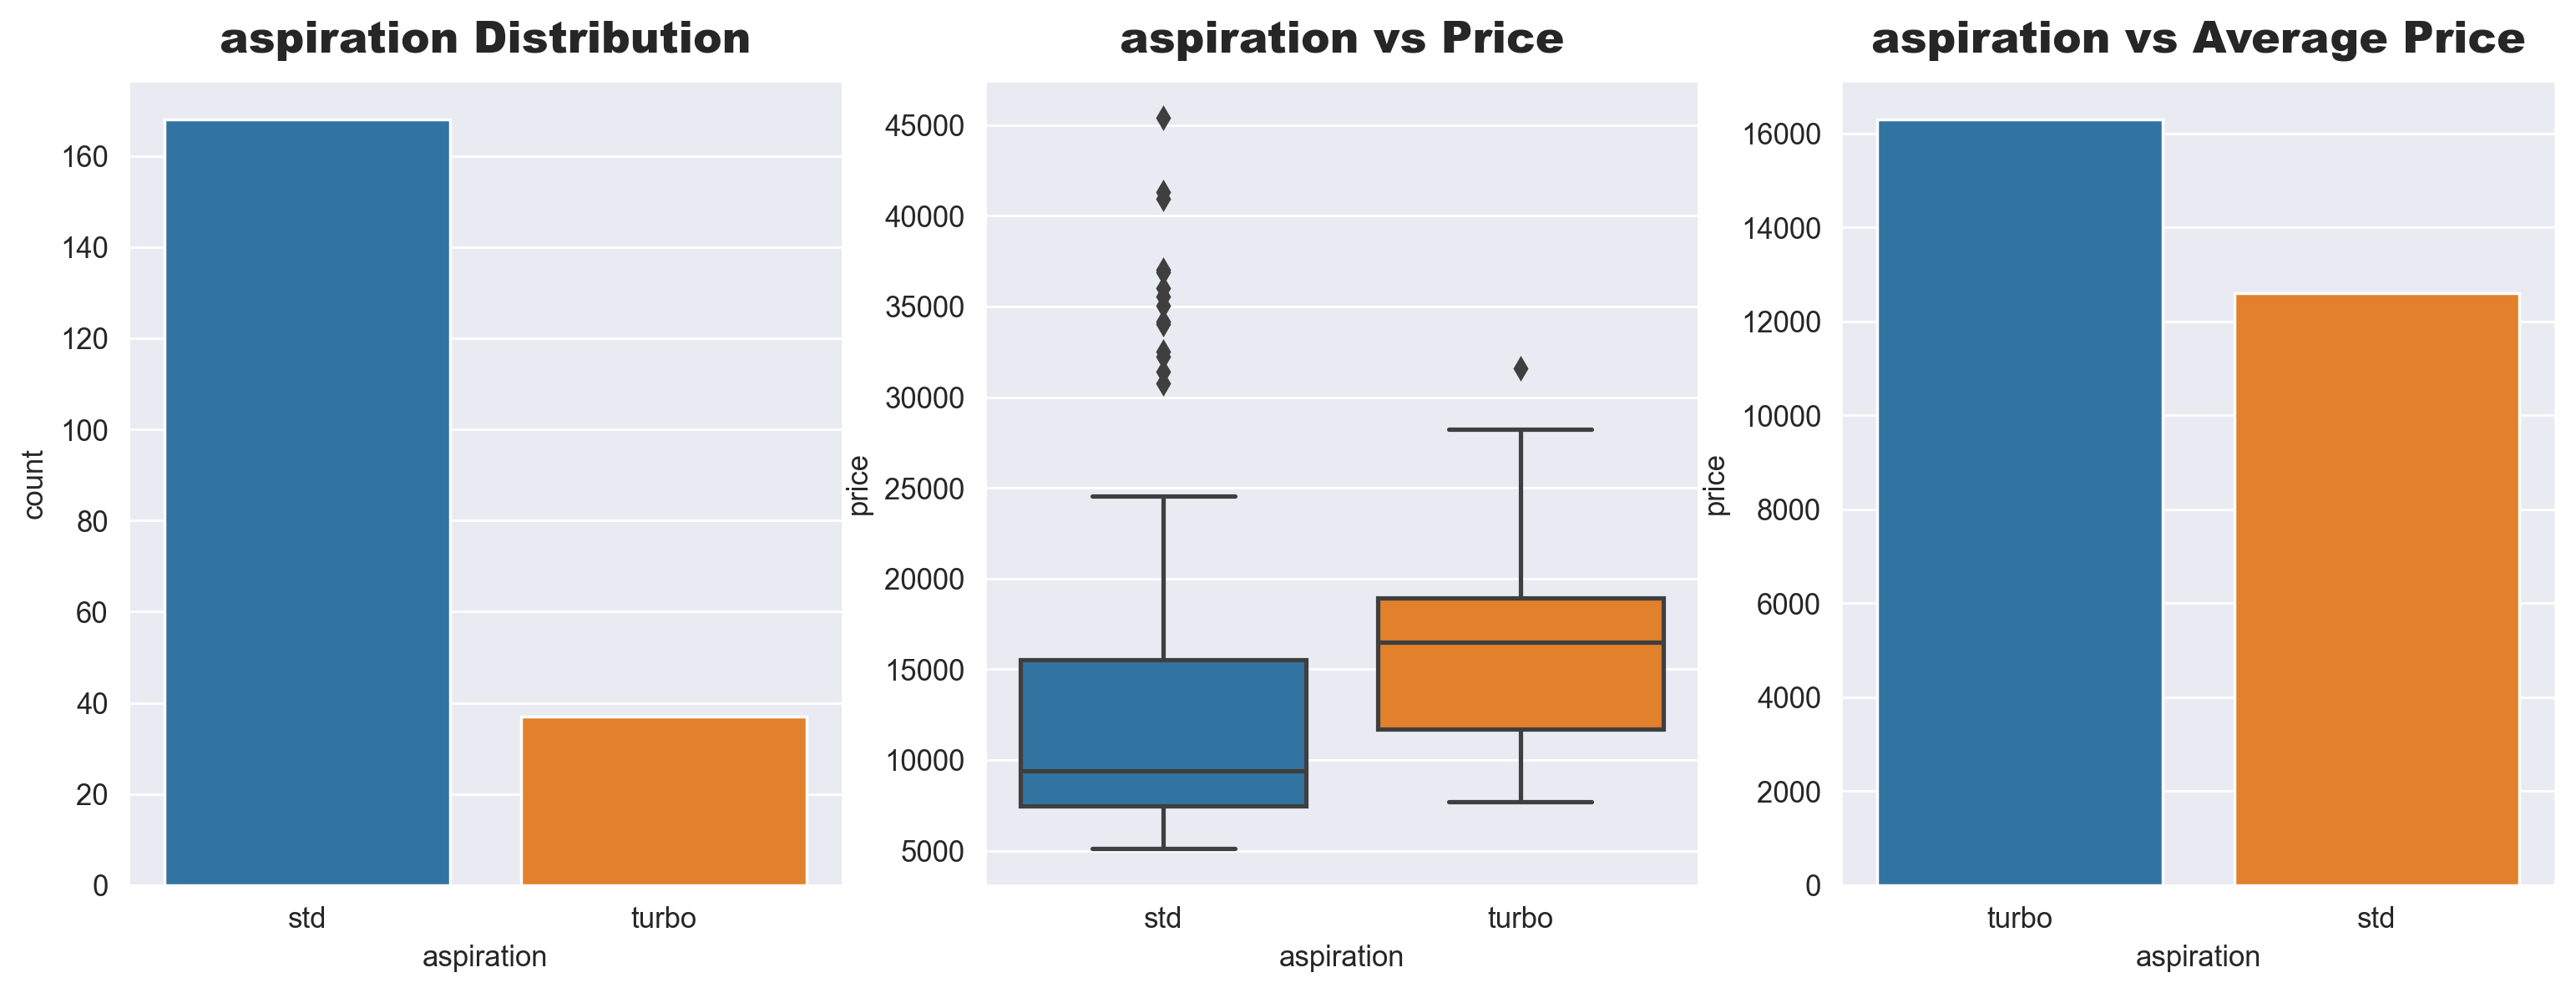

In [23]:
categorical_vis('aspiration')

1. Cars having STD aspiration are highly sold
2. Cars having turbo charge aspiration have higher price 
3. Outliers present in the std aspiration seems that the cars are expensive too in std aspiration

- Visualize Door Number feature

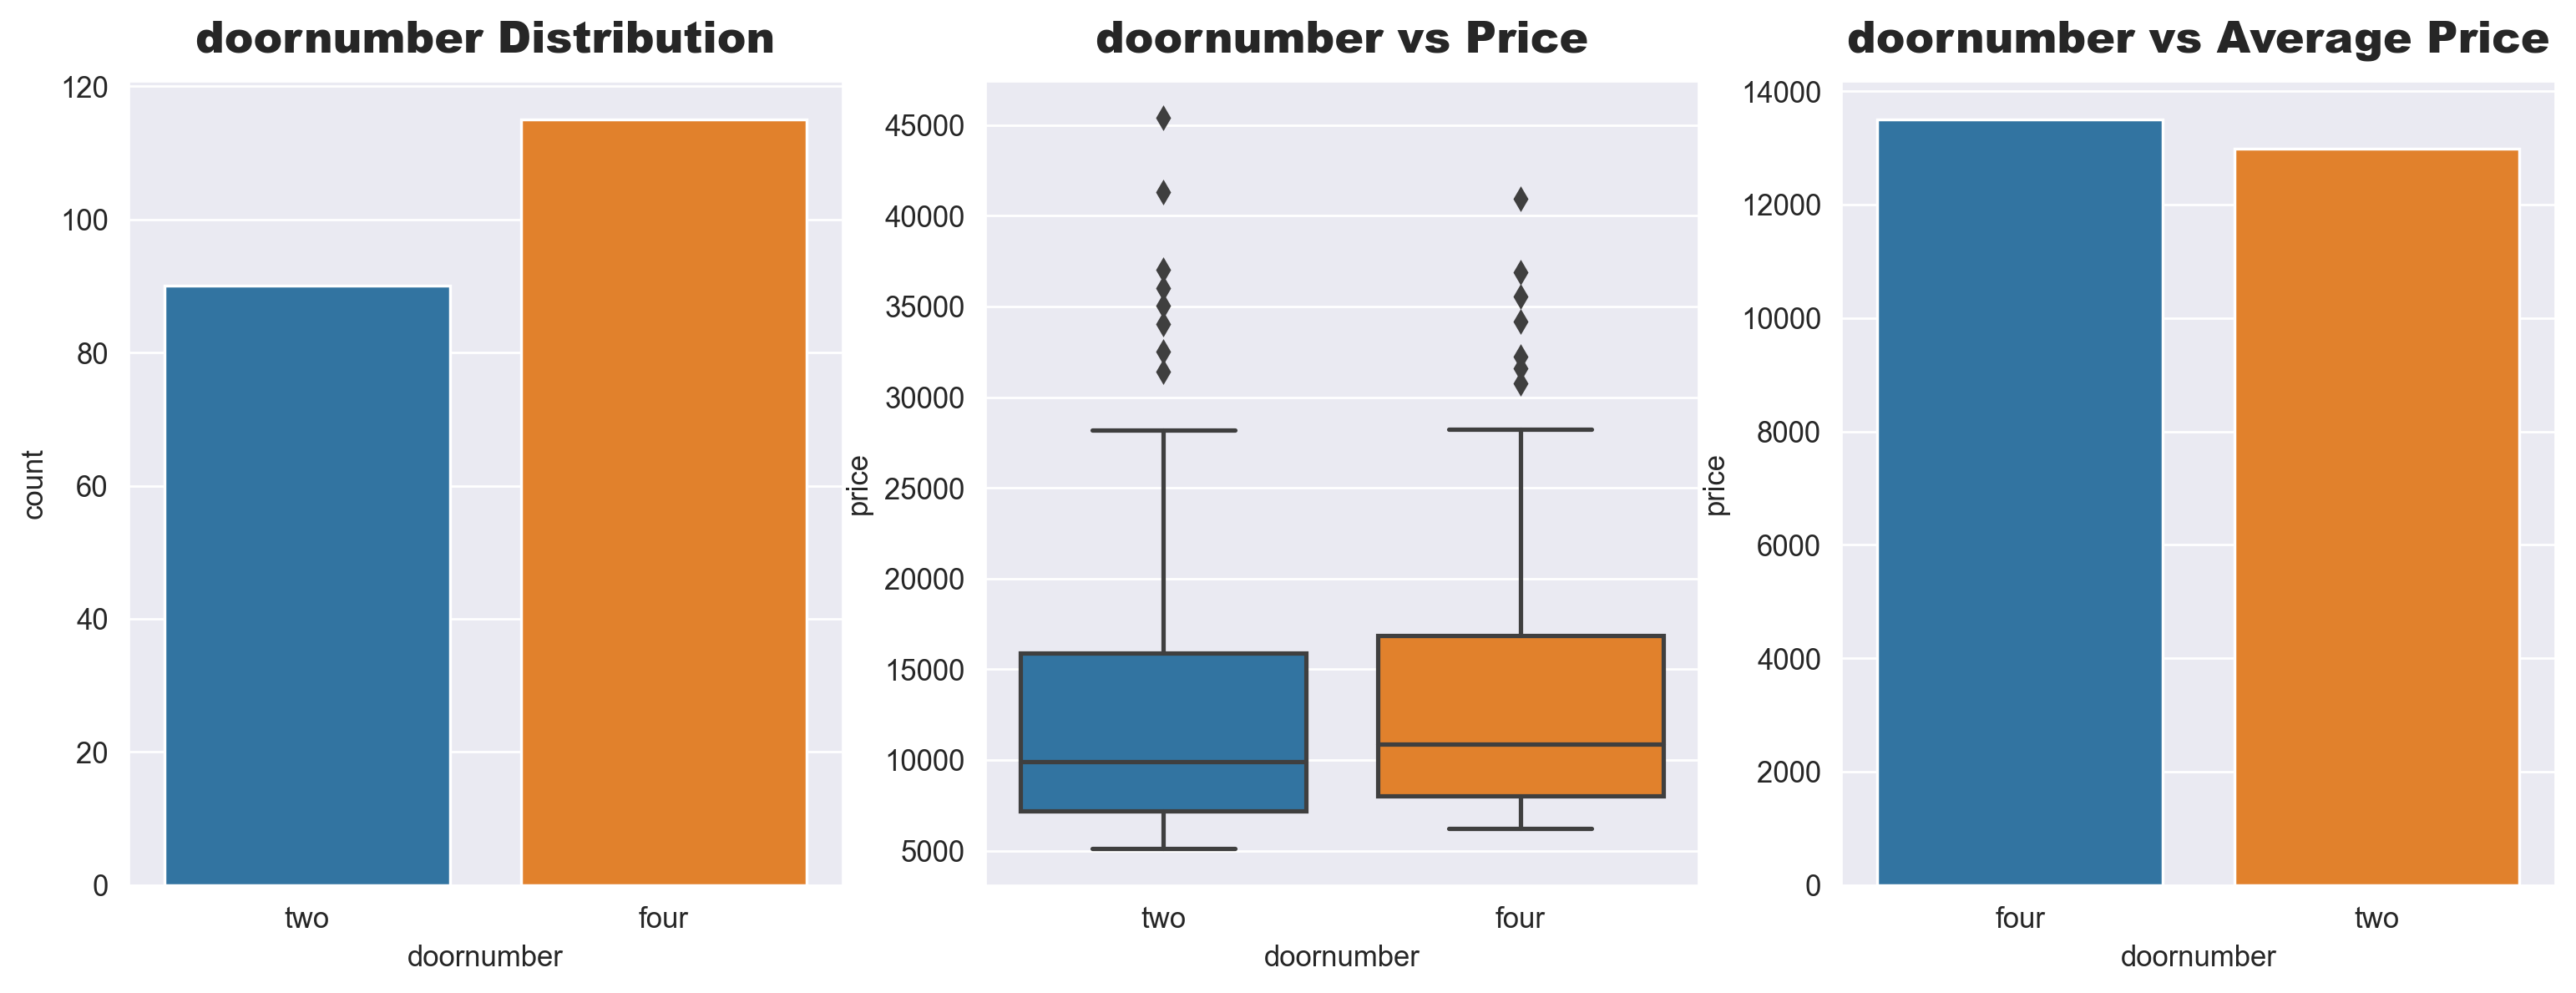

In [24]:
categorical_vis('doornumber')

1. Cars having four door mostly sold
2. Cars having four door are little expensive when compare the average price
3. There is no big difference between the sales of cars having four door and two door
4. Door number category is not affecting the price that much

- Visualizing Car Body feature

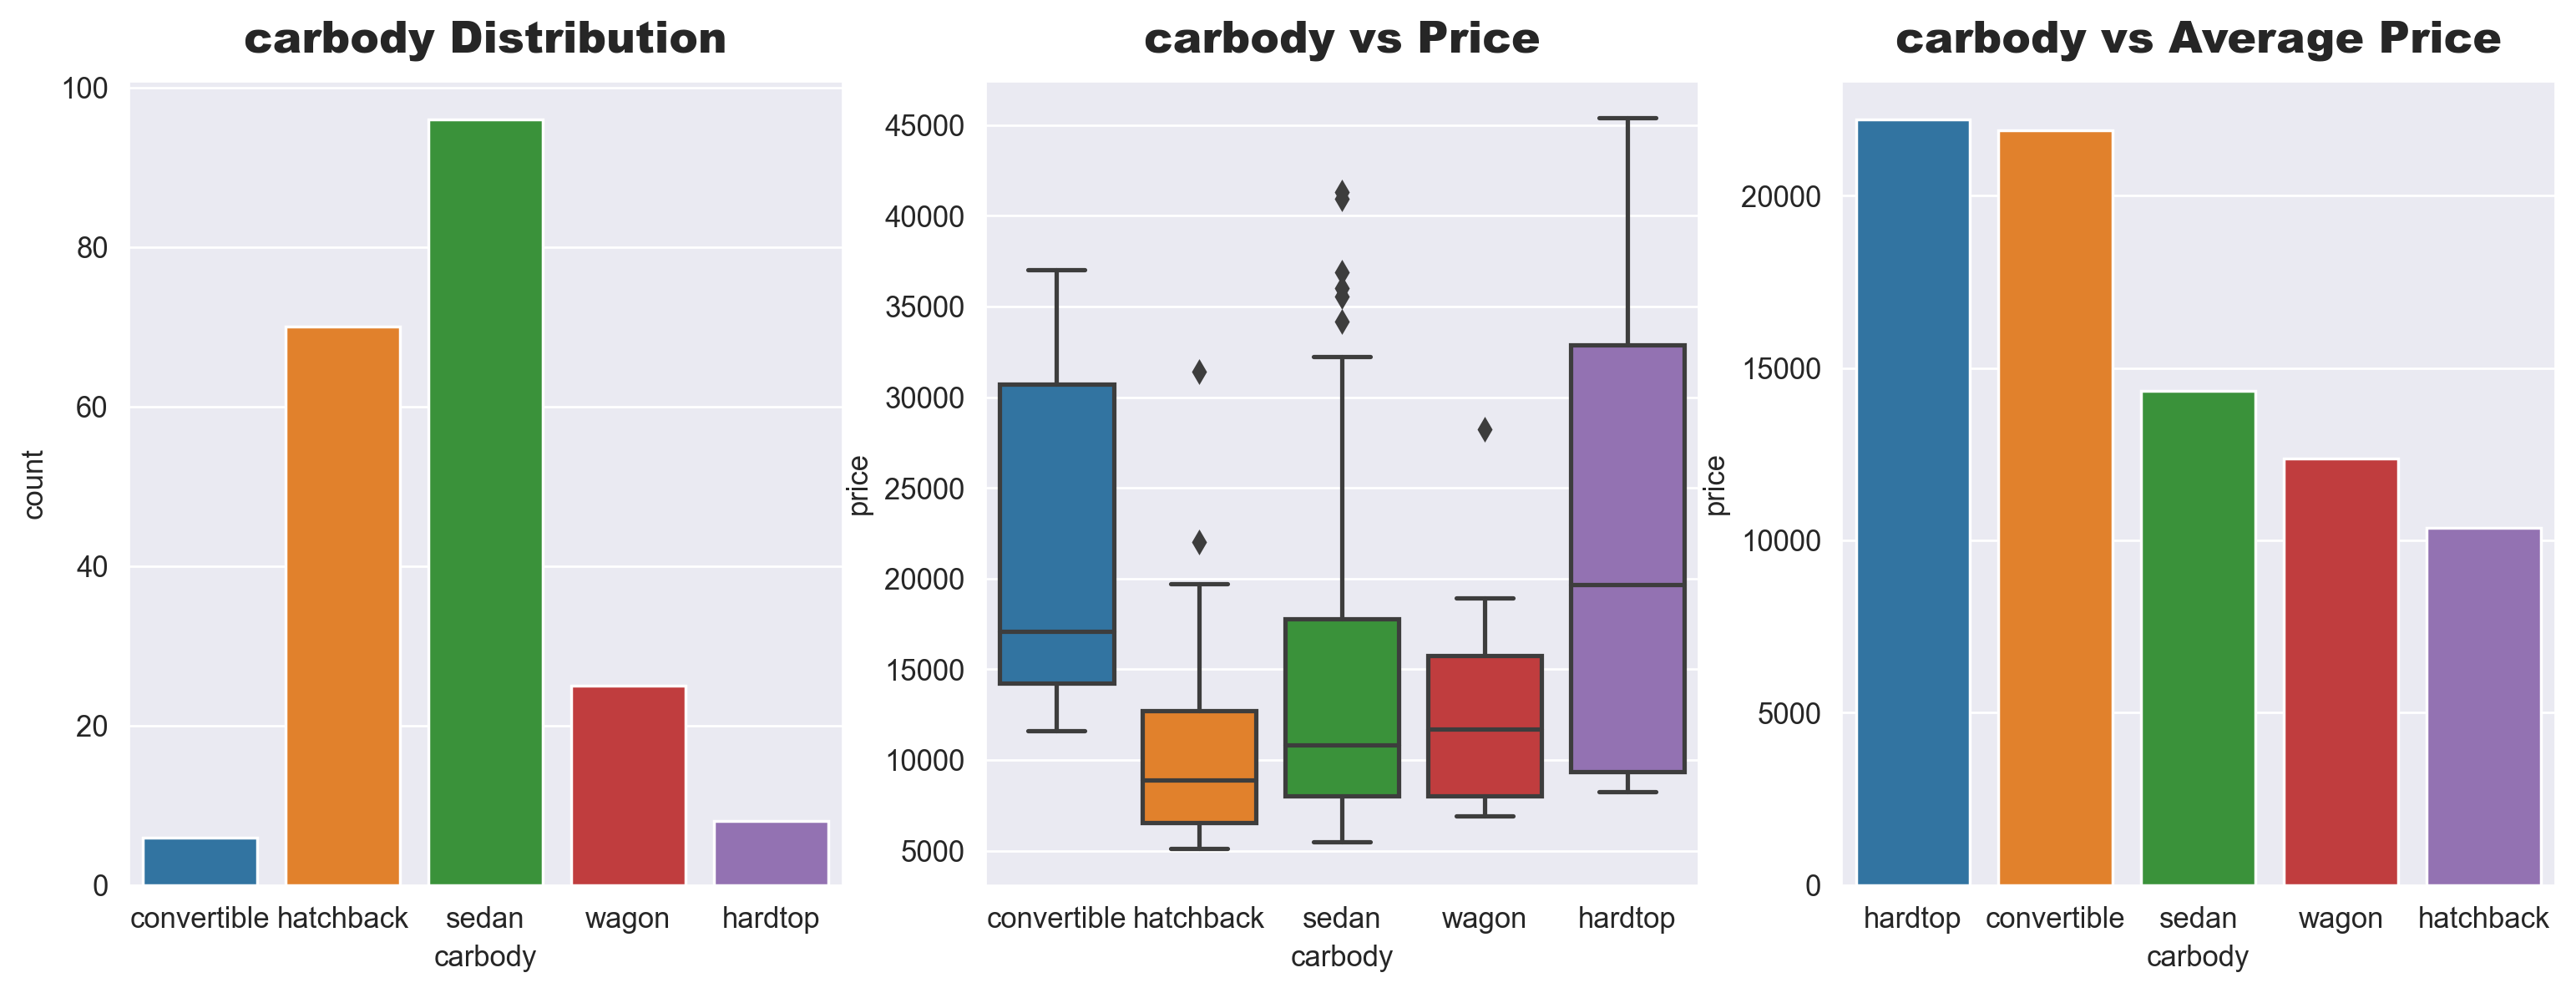

In [25]:
categorical_vis('carbody')

1. Cars having sedan type are mostly sold
2. Cars having Hard top type is mostly sold followed by Convertible
3. Sedan type are is 3rd most expensive car. But still its having most number of car sales.
   So customer prefer medium price range car and sedan car

- Visualzing Driving wheel feature

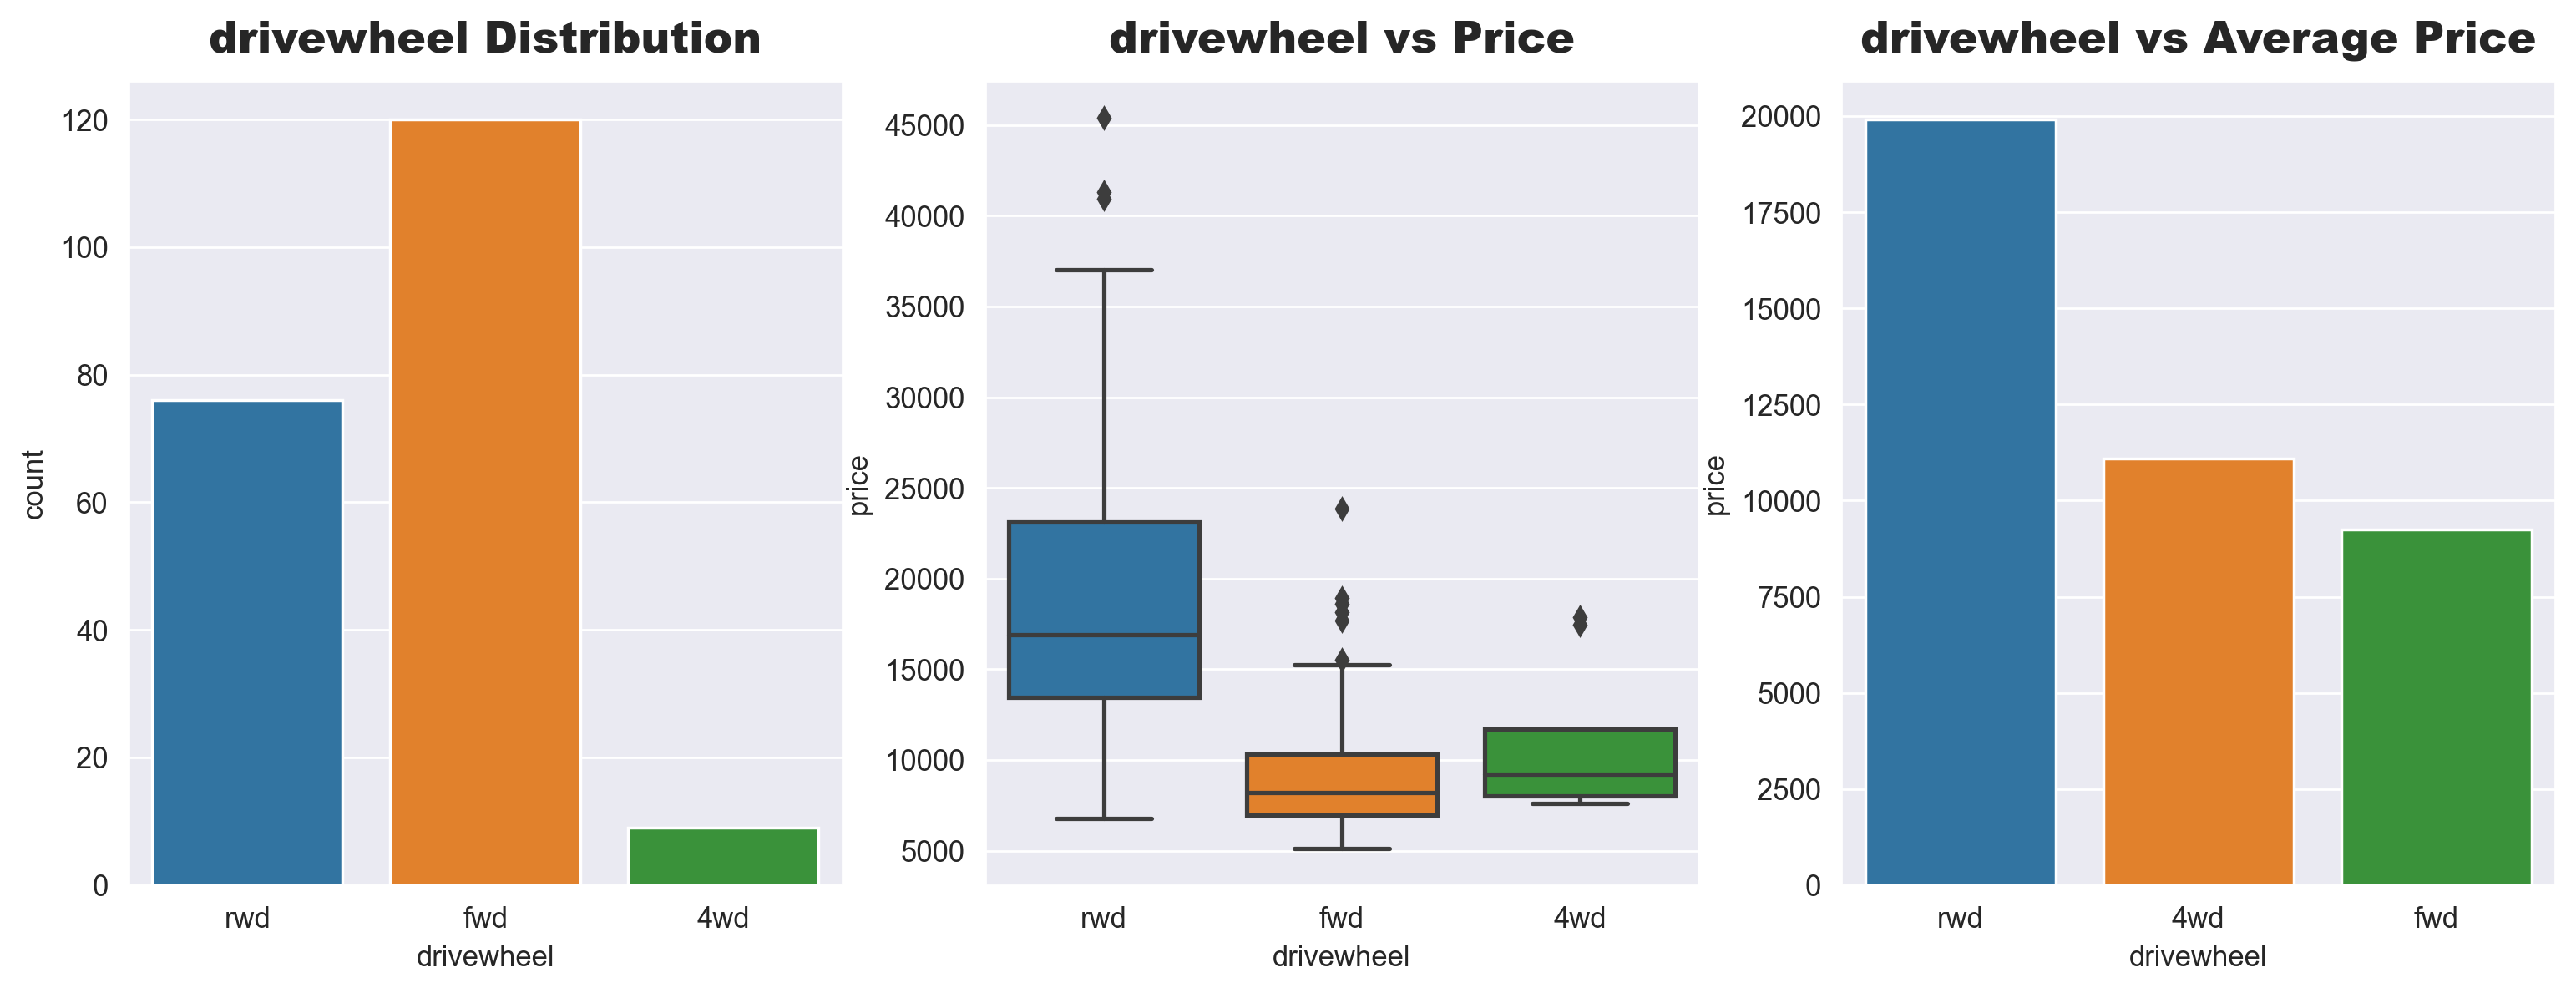

In [26]:
categorical_vis('drivewheel')

1. Most of the cars which are sold are having Front wheel drive(FWD) followed by Rear wheel drive(RWD)
2. Cars which having FWD are cheapest and RWD are expensive
3. Cars with low price must be using FWD.

- Visualizing Engine location Feature

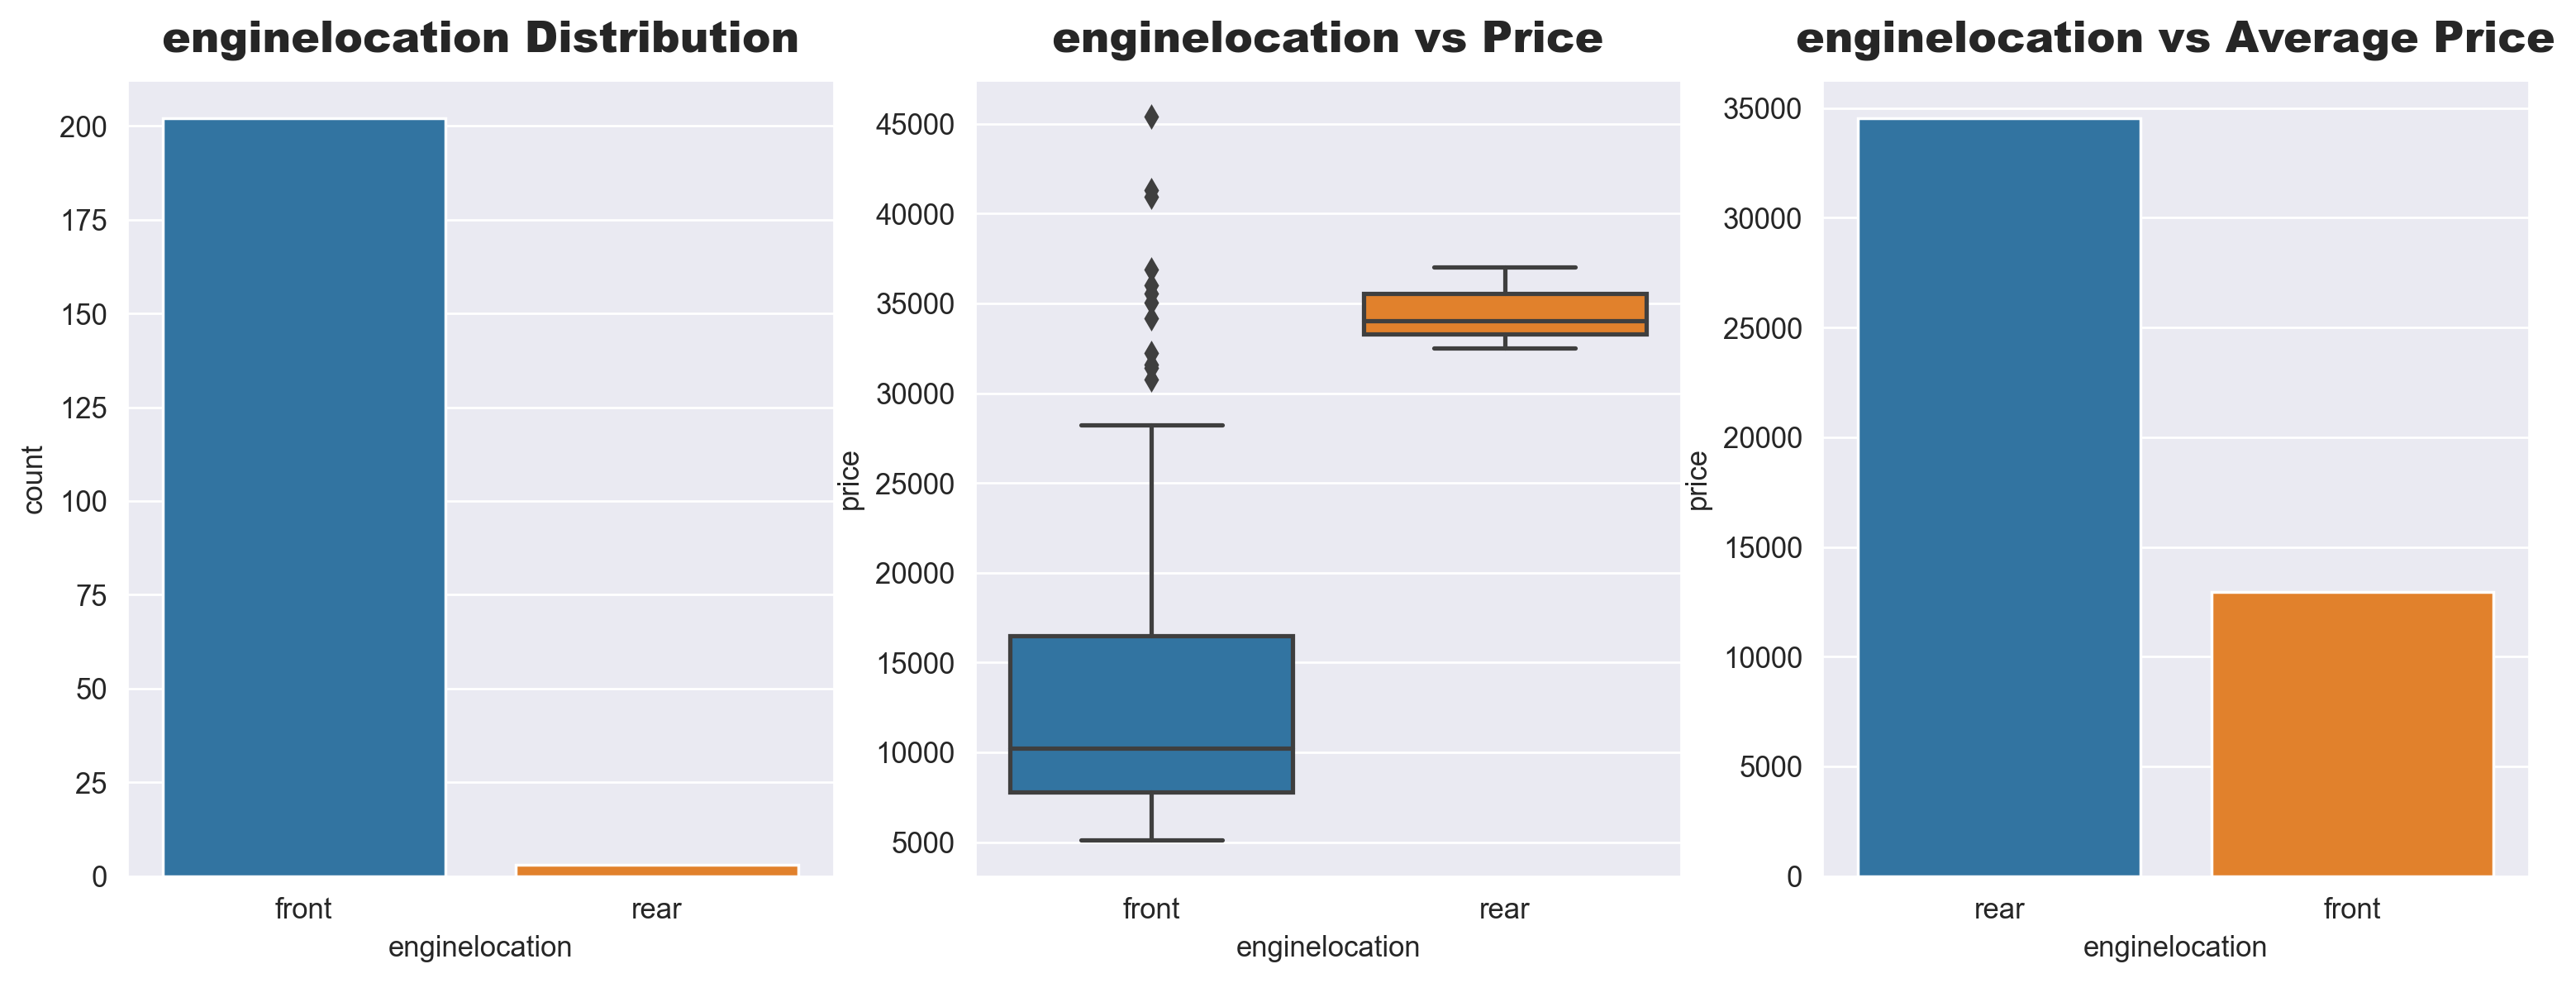

In [27]:
categorical_vis('enginelocation')

In [28]:
df[df['enginelocation'] == 'rear']

symboling CompanyName fueltype aspiration doornumber      carbody  \
car_ID                                                                      
127             3     porsche      gas        std        two      hardtop   
128             3     porsche      gas        std        two      hardtop   
129             3     porsche      gas        std        two  convertible   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
127           rwd           rear       89.5      168.9  ...         194   
128           rwd           rear       89.5      168.9  ...         194   
129           rwd           rear       89.5      168.9  ...         194   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
127           mpfi       3.74    2.9              9.5         207    5900   
128           mpfi       3.74    2.9              9.5         207    5900   
129           mpfi       3.74    2.9              9.5         207    5900   

        citympg  highwaympg    price  
car_ID                                
127          17          25  32528.0  
128          17          25  34028.0  
129          17          25  37028.0  

[3 rows x 25 columns]

1. Most of the cars are having engine location in front
2. There is only 3 cars in rear engine location

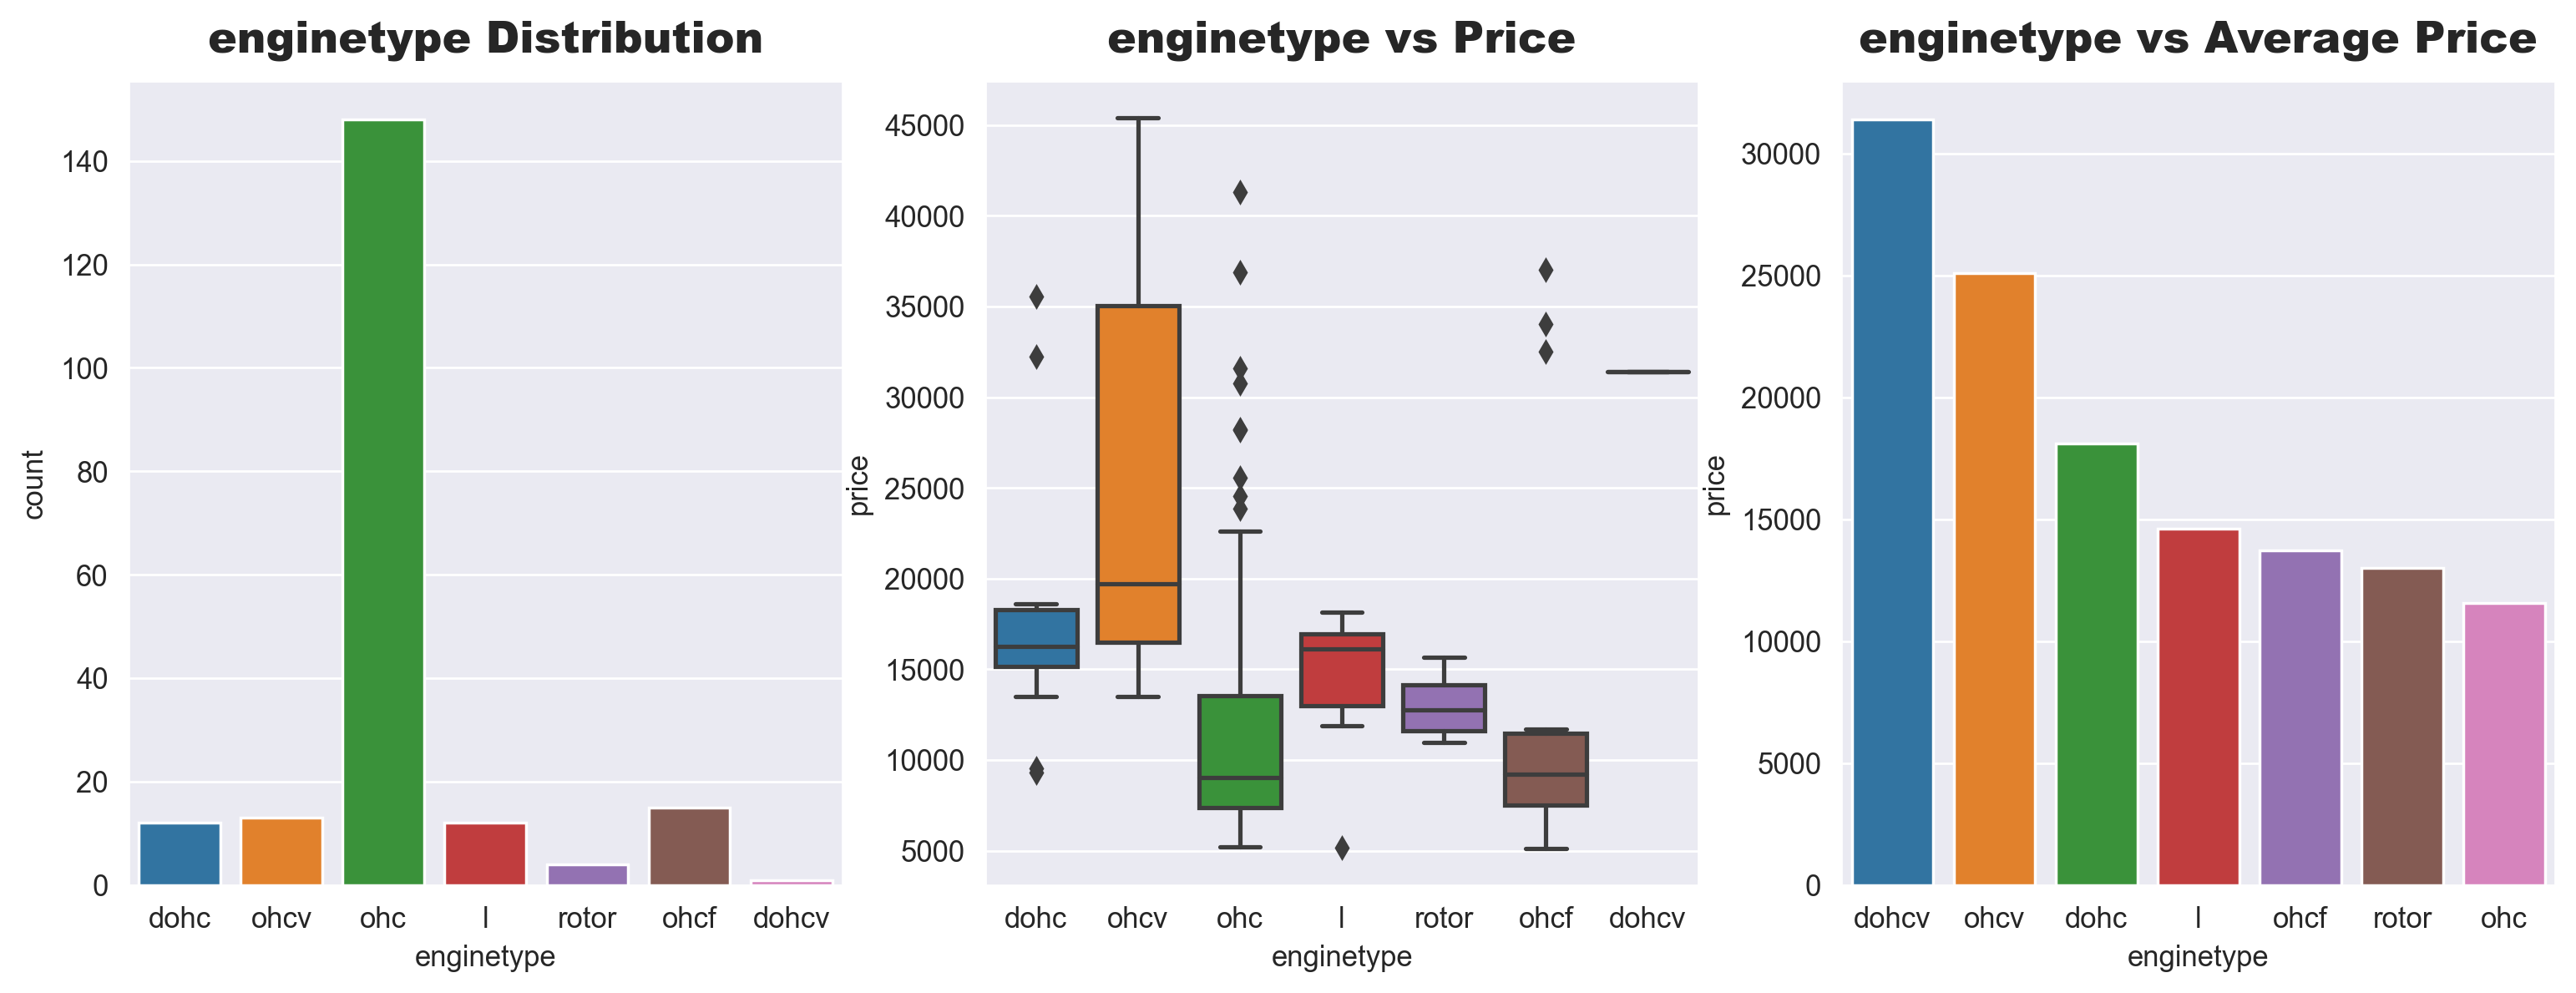

In [29]:
categorical_vis('enginetype')

1. Cars having overhead CamShaft (OHC) engines are highly sold
2. There are very few datapoints of engine dohcv and rotor
3. Cars having OHC are least expensive

- Visualizing Cylinder Number feature

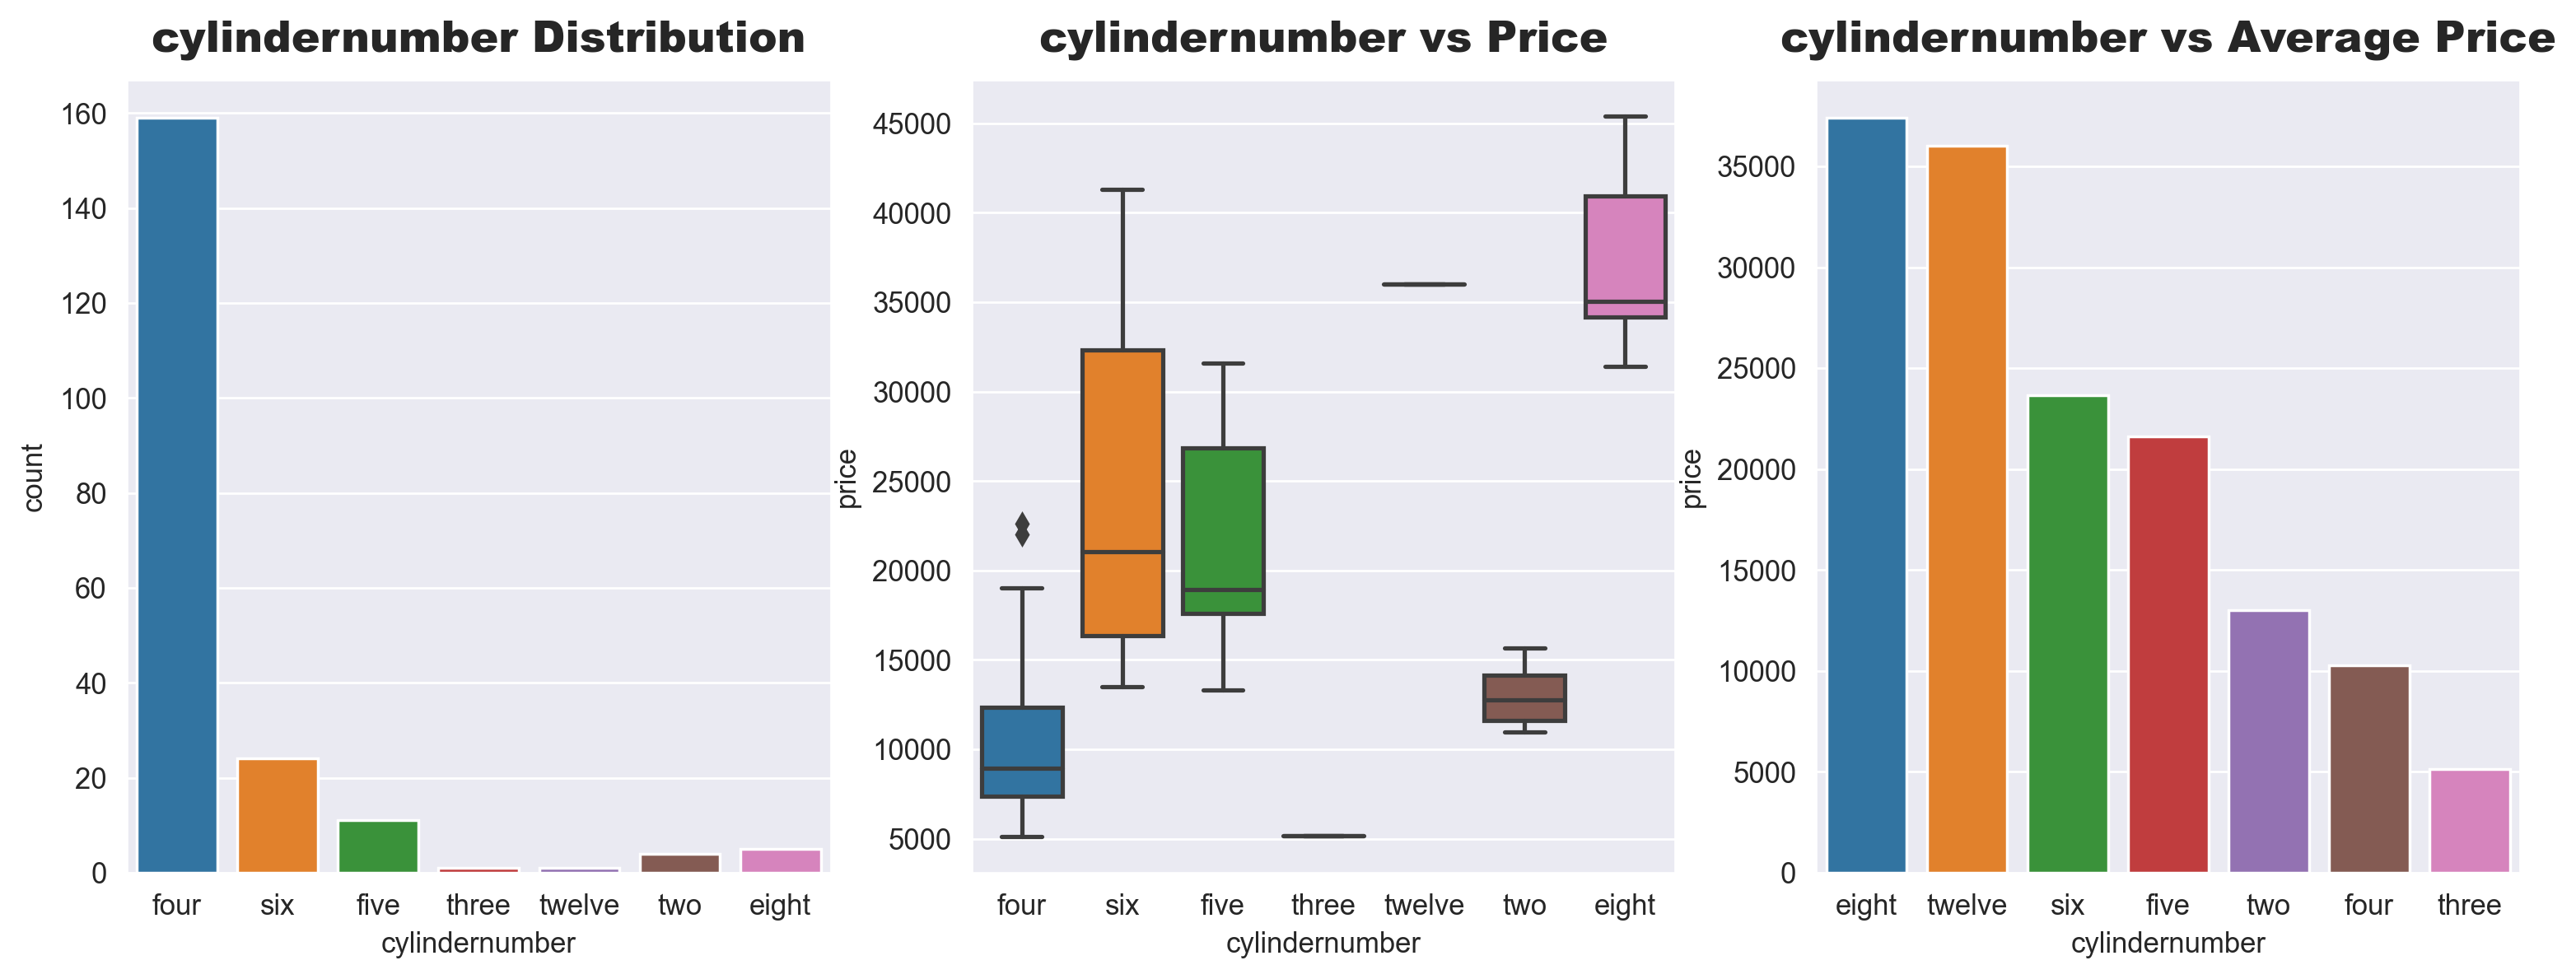

In [30]:
categorical_vis('cylindernumber')

In [31]:
df[df['cylindernumber'] == 'three']

symboling CompanyName fueltype aspiration doornumber    carbody  \
car_ID                                                                    
19              2   chevrolet      gas        std        two  hatchback   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
19            fwd          front       88.4      141.1  ...          61   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
19            2bbl       2.91   3.03              9.5          48    5100   

        citympg  highwaympg   price  
car_ID                               
19           47          53  5151.0  

[1 rows x 25 columns]

In [32]:
df[df['cylindernumber'] == 'twelve']

symboling CompanyName fueltype aspiration doornumber carbody  \
car_ID                                                                 
50              0      jaguar      gas        std        two   sedan   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
50            rwd          front      102.0      191.7  ...         326   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
50            mpfi       3.54   2.76             11.5         262    5000   

        citympg  highwaympg    price  
car_ID                                
50           13          17  36000.0  

[1 rows x 25 columns]

In [33]:
df[df['cylindernumber'] == 'two']

symboling CompanyName fueltype aspiration doornumber    carbody  \
car_ID                                                                    
56              3       mazda      gas        std        two  hatchback   
57              3       mazda      gas        std        two  hatchback   
58              3       mazda      gas        std        two  hatchback   
59              3       mazda      gas        std        two  hatchback   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
56            rwd          front       95.3      169.0  ...          70   
57            rwd          front       95.3      169.0  ...          70   
58            rwd          front       95.3      169.0  ...          70   
59            rwd          front       95.3      169.0  ...          80   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
56            4bbl       3.33  3.255              9.4         101    6000   
57            4bbl       3.33  3.255              9.4         101    6000   
58            4bbl       3.33  3.255              9.4         101    6000   
59            mpfi       3.33  3.255              9.4         135    6000   

        citympg  highwaympg    price  
car_ID                                
56           17          23  10945.0  
57           17          23  11845.0  
58           17          23  13645.0  
59           16          23  15645.0  

[4 rows x 25 columns]

1. Most of the cars are having four cylinder
2. In Three and twelve cylinder number there are only one datapoint
3. Cars having eight cylinder are most expensive cars

- Visualizing Fuel System

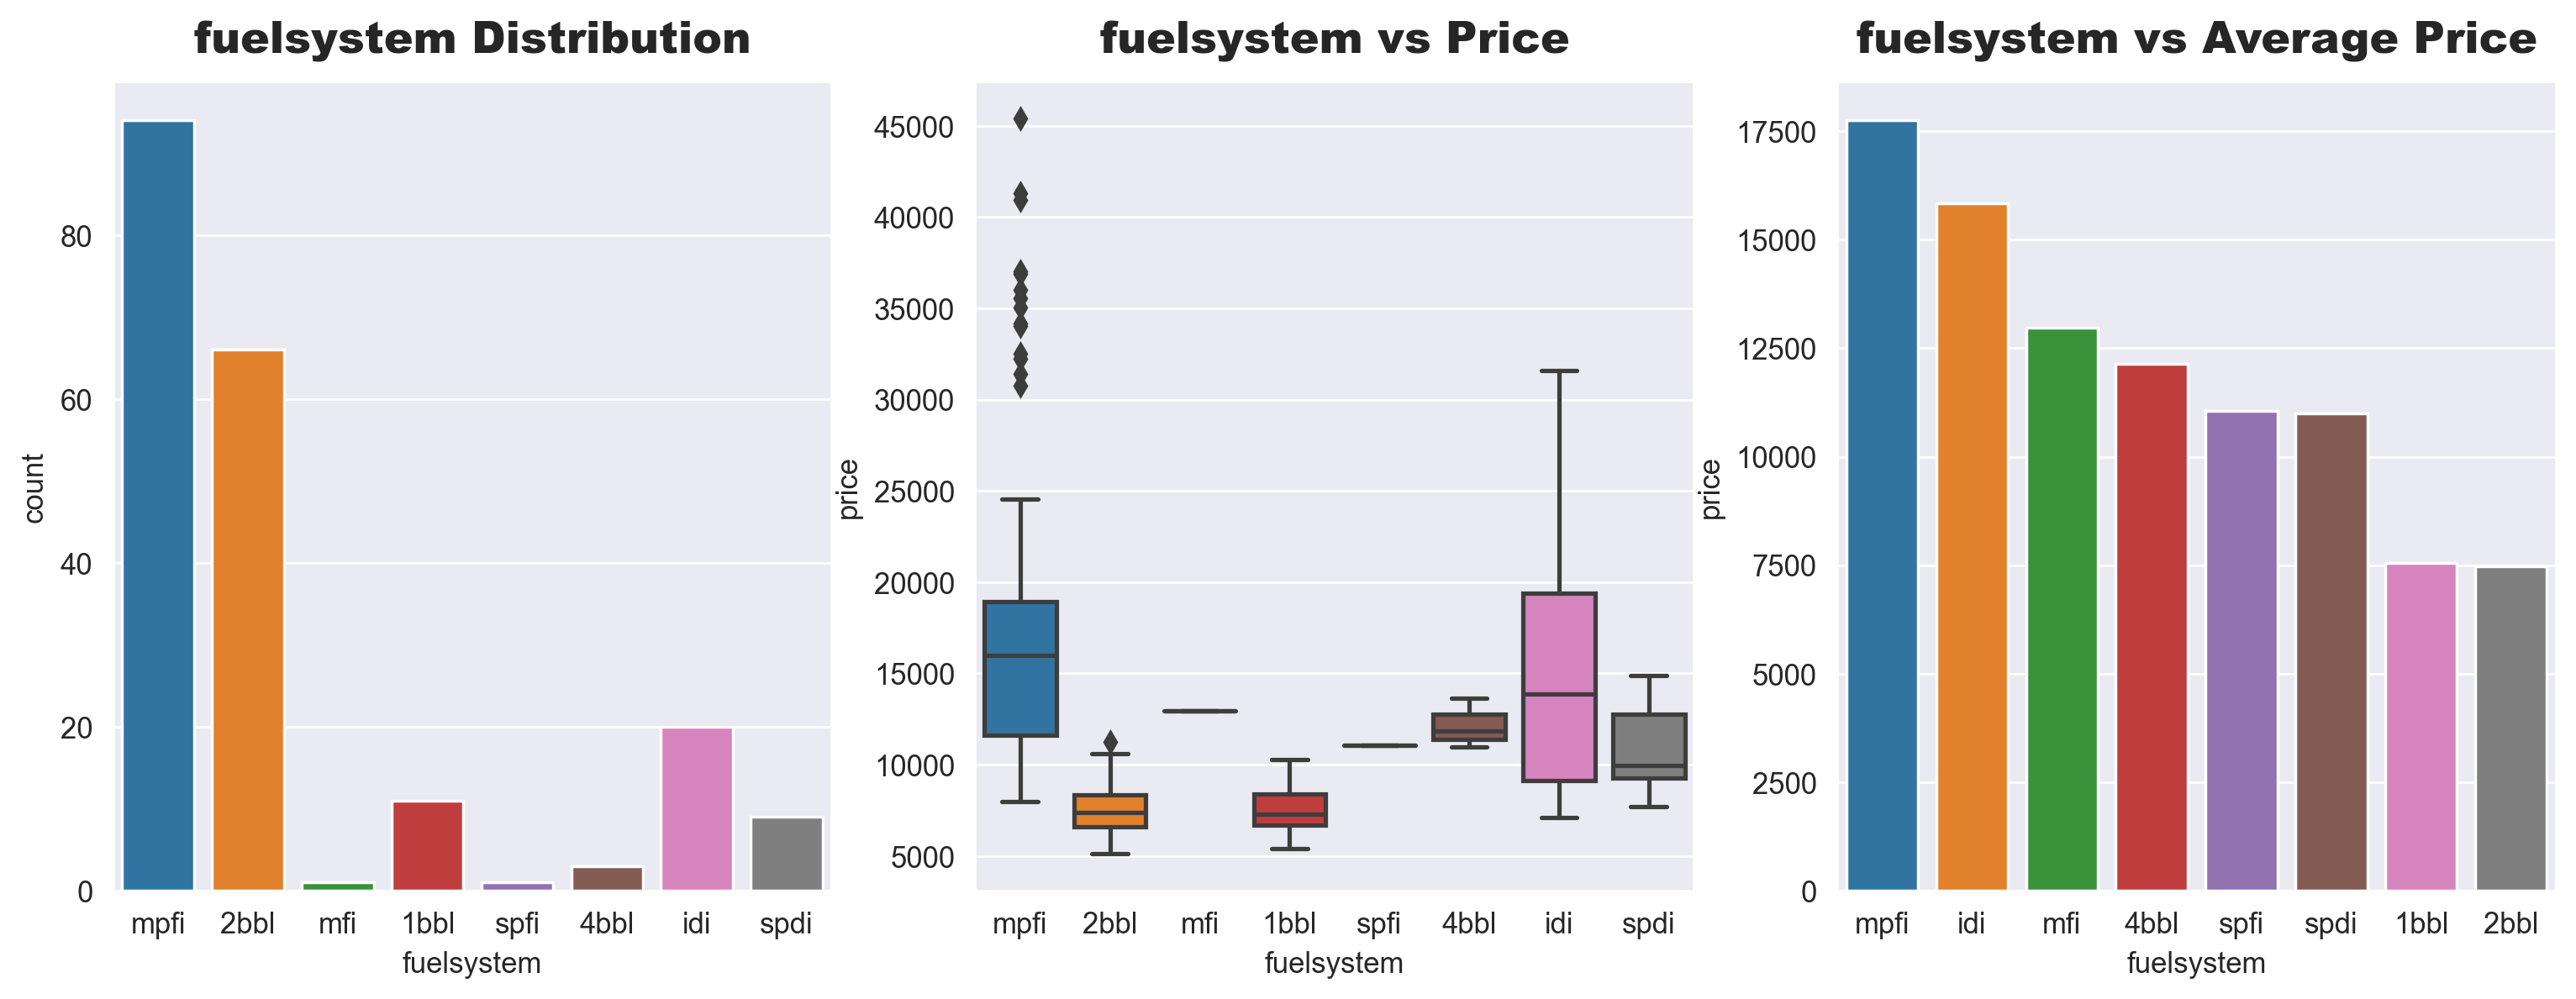

In [34]:
categorical_vis('fuelsystem')

In [35]:
df[df['fuelsystem']== 'mfi']

symboling CompanyName fueltype aspiration doornumber    carbody  \
car_ID                                                                    
30              3       dodge      gas      turbo        two  hatchback   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
30            fwd          front       95.9      173.2  ...         156   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
30             mfi        3.6    3.9              7.0         145    5000   

        citympg  highwaympg    price  
car_ID                                
30           19          24  12964.0  

[1 rows x 25 columns]

In [36]:
df[df['fuelsystem'] == '4bbl']

symboling CompanyName fueltype aspiration doornumber    carbody  \
car_ID                                                                    
56              3       mazda      gas        std        two  hatchback   
57              3       mazda      gas        std        two  hatchback   
58              3       mazda      gas        std        two  hatchback   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
56            rwd          front       95.3      169.0  ...          70   
57            rwd          front       95.3      169.0  ...          70   
58            rwd          front       95.3      169.0  ...          70   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
56            4bbl       3.33  3.255              9.4         101    6000   
57            4bbl       3.33  3.255              9.4         101    6000   
58            4bbl       3.33  3.255              9.4         101    6000   

        citympg  highwaympg    price  
car_ID                                
56           17          23  10945.0  
57           17          23  11845.0  
58           17          23  13645.0  

[3 rows x 25 columns]

In [37]:
df[df['fuelsystem'] == 'spfi'] 

symboling CompanyName fueltype aspiration doornumber    carbody  \
car_ID                                                                    
47              2       isuzu      gas        std        two  hatchback   

       drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
car_ID                                                  ...               
47            rwd          front       96.0      172.6  ...         119   

        fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
car_ID                                                                      
47            spfi       3.43   3.23              9.2          90    5000   

        citympg  highwaympg    price  
car_ID                                
47           24          29  11048.0  

[1 rows x 25 columns]

1. Most of the car having mpfi and 2bbl fuel system.
2. Cars having mpfi fuel system are expensive car followed by idi fuel system

- Visualizing Symboling feature

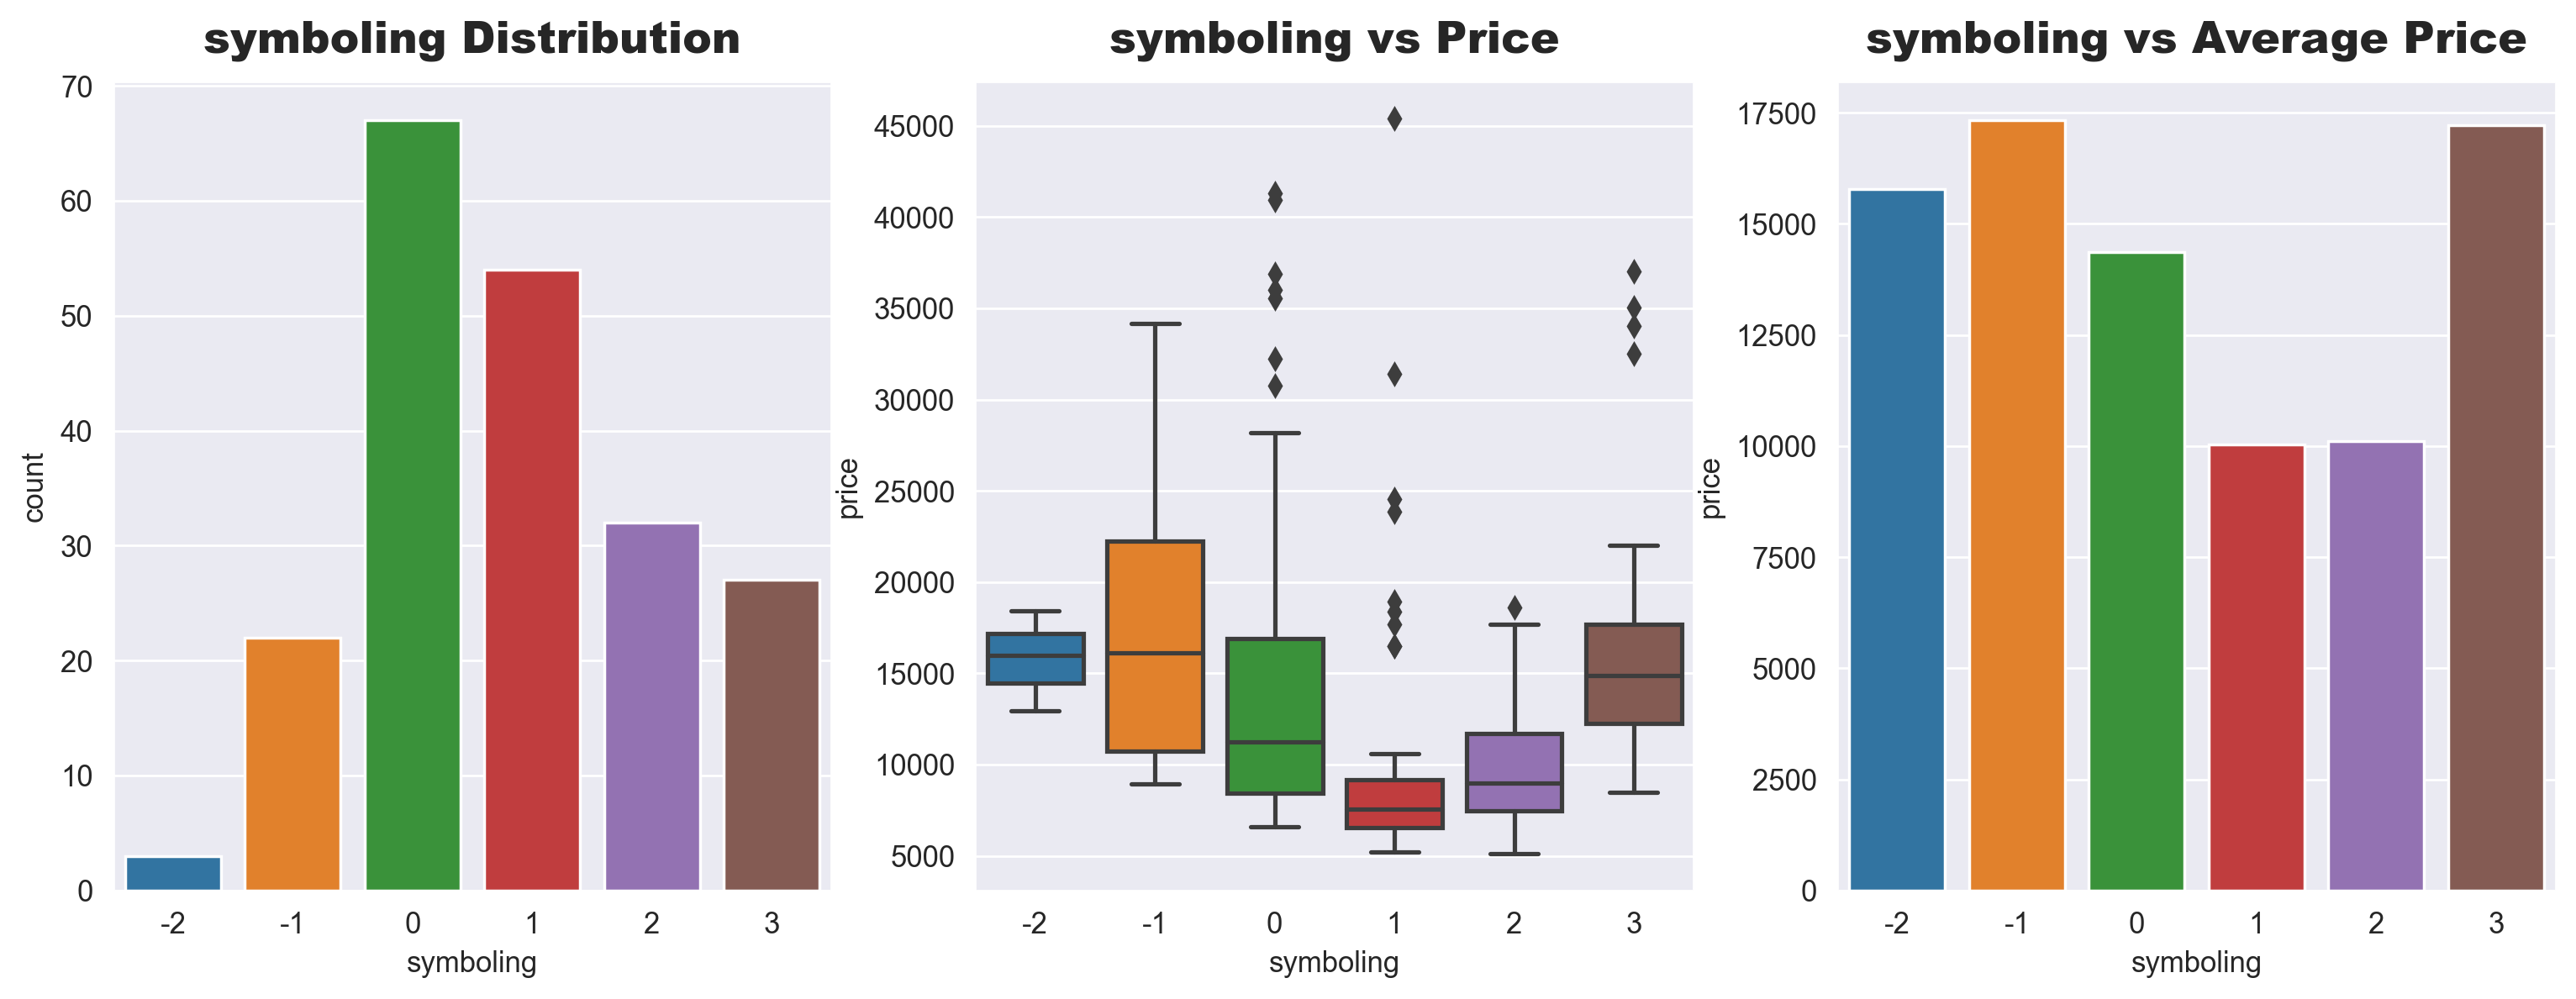

In [38]:
categorical_vis('symboling')

1. Cars having symboling 0 and 1 are mostly preferred
2. Symboling -1,3 and 0 are expensive

- Visualizing Car Height, Car Width, Car length feature w.r.t Price

In [39]:
def scatter_plot(col):
    x = 1
    plt.figure(figsize= (15,6))
    for i in col:
        plt.subplot(1,3,x)
        sns.scatterplot(x = i, y = 'price', data = df, color = 'Blue')
        plt.title(f'{i} vs Price',fontweight = 'black', fontsize = 15, pad = 10)
        plt.tight_layout()
        x += 1

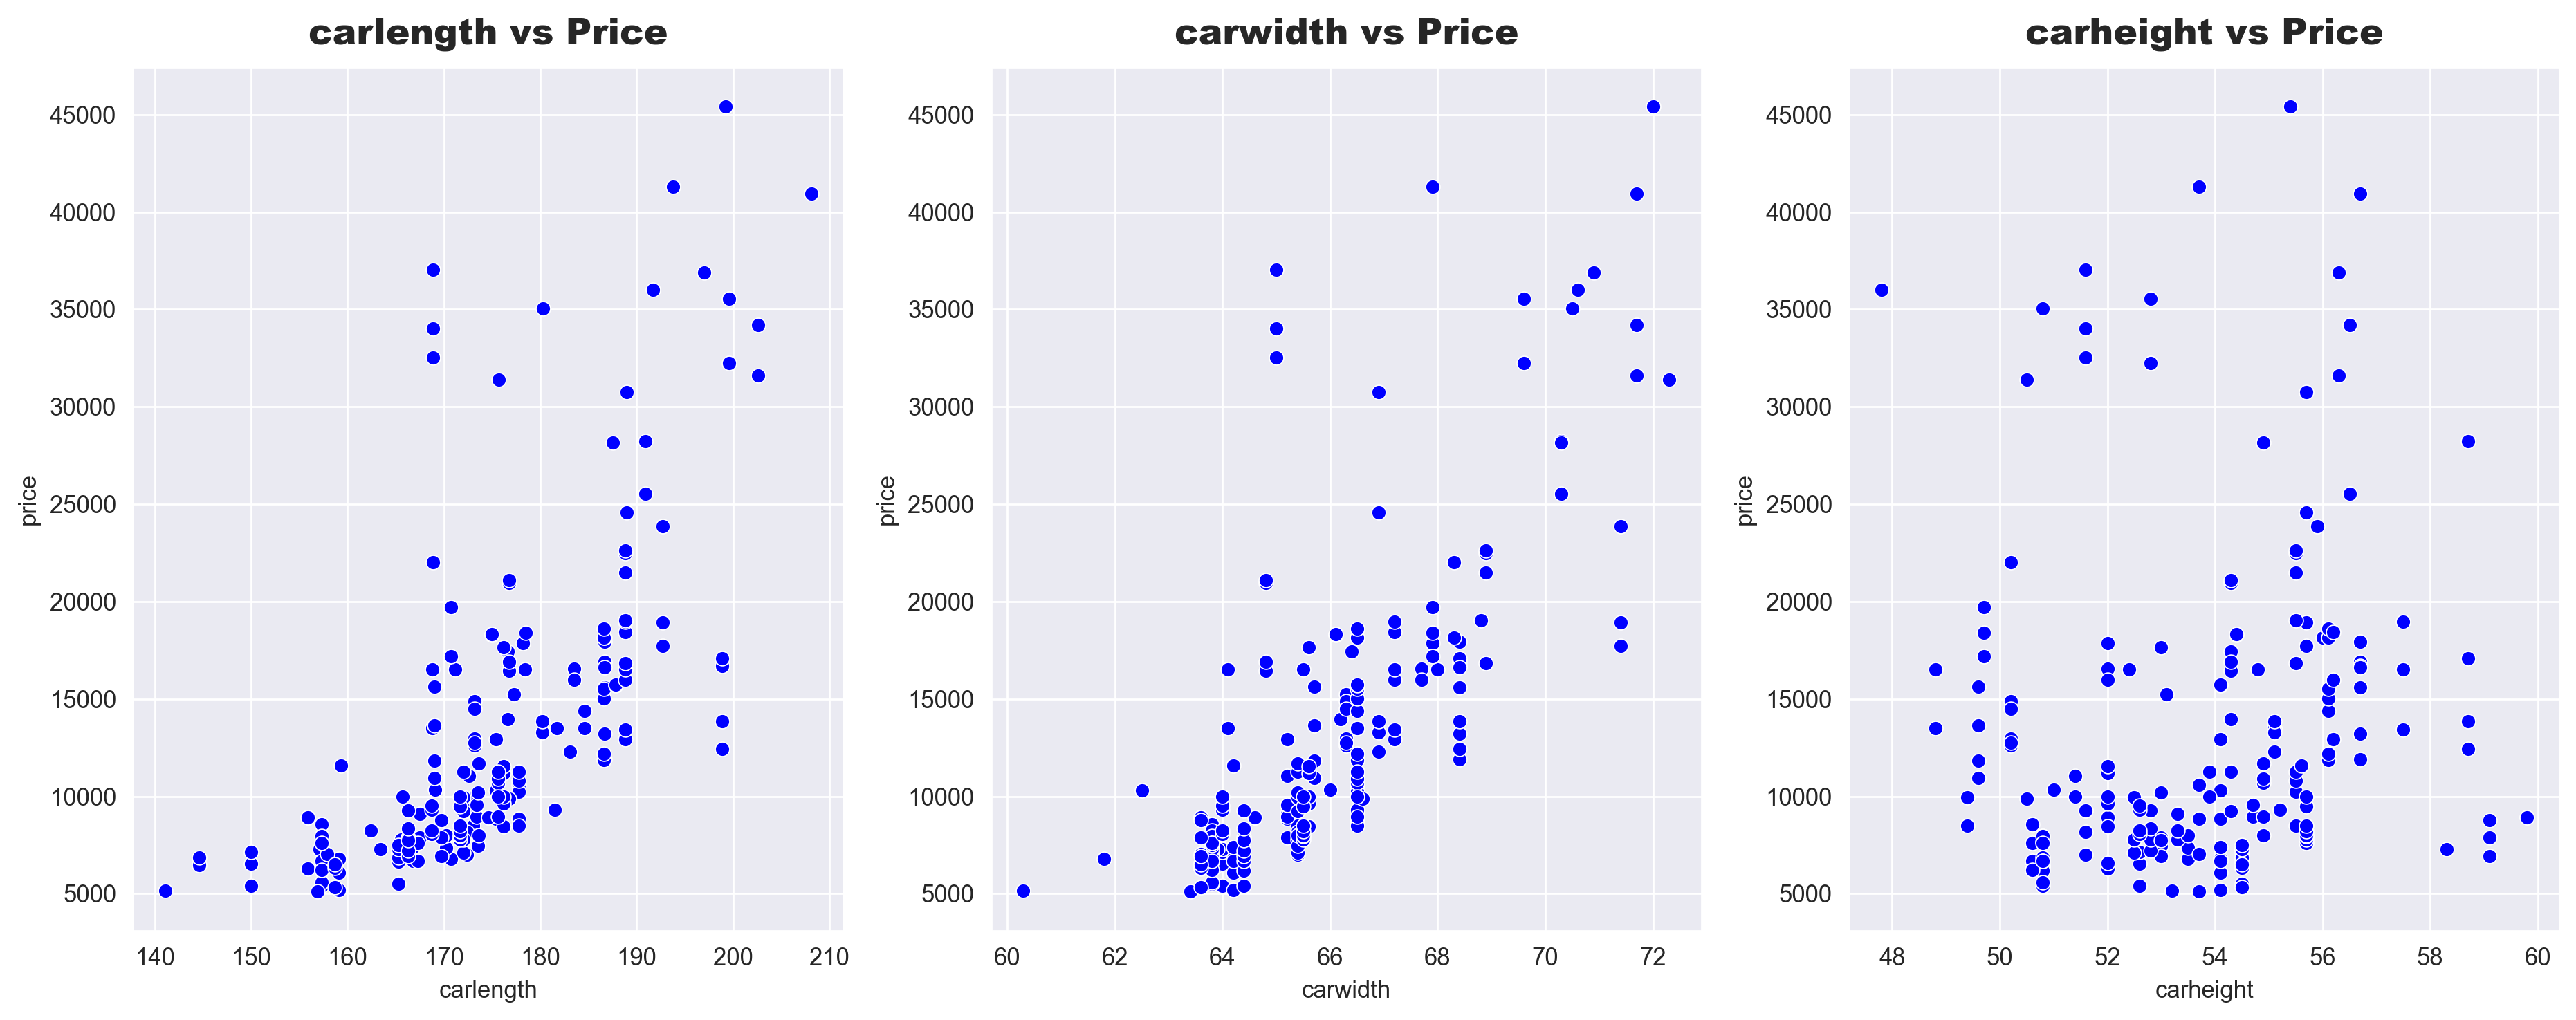

In [40]:
scatter_plot(['carlength', 'carwidth', 'carheight'])

1. CarLength and CarWidth column are highly correlated with price column.
2. So increase in length and width of the car there is an increase in price too.
3. CarHeight is not affecting price.

* Visualizing EngineSize, BorRatio, Stroke

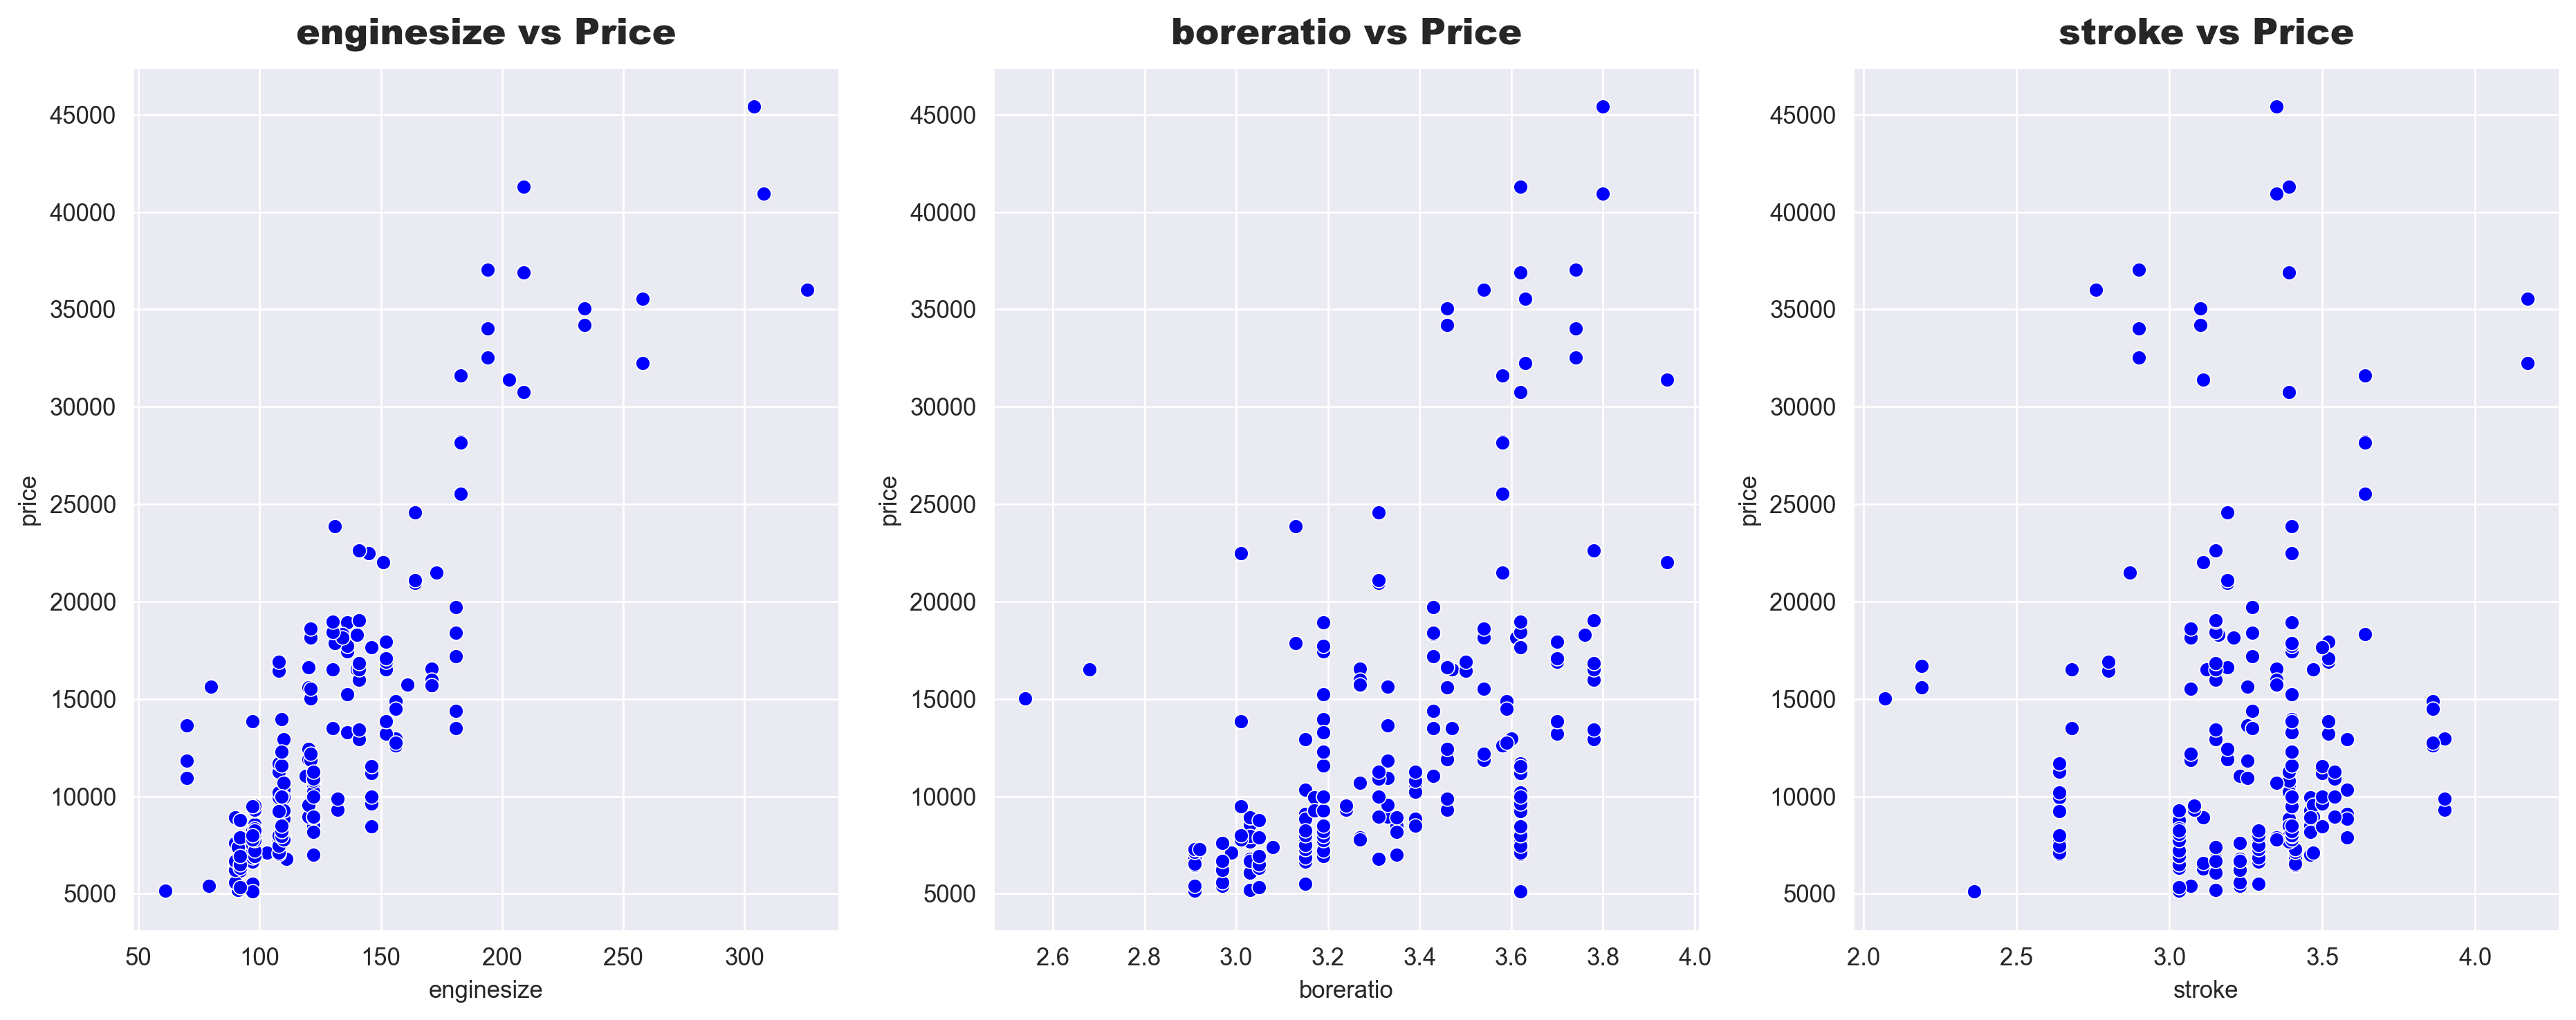

In [41]:
scatter_plot(['enginesize','boreratio','stroke'])

1. EngineSize is highly correlated with price. 
   So we can say with the increment in engineSize the price also increases.
2. BoreRatio is not highly correlated but still is some correlation between column.
   So we can say with the increment in BoreSize the price also increases.
3. From stroke vs Price we can't make any inference as the data point are too scattered.

* Visualizing CompressionRatio, HorsePower, PeakRPM

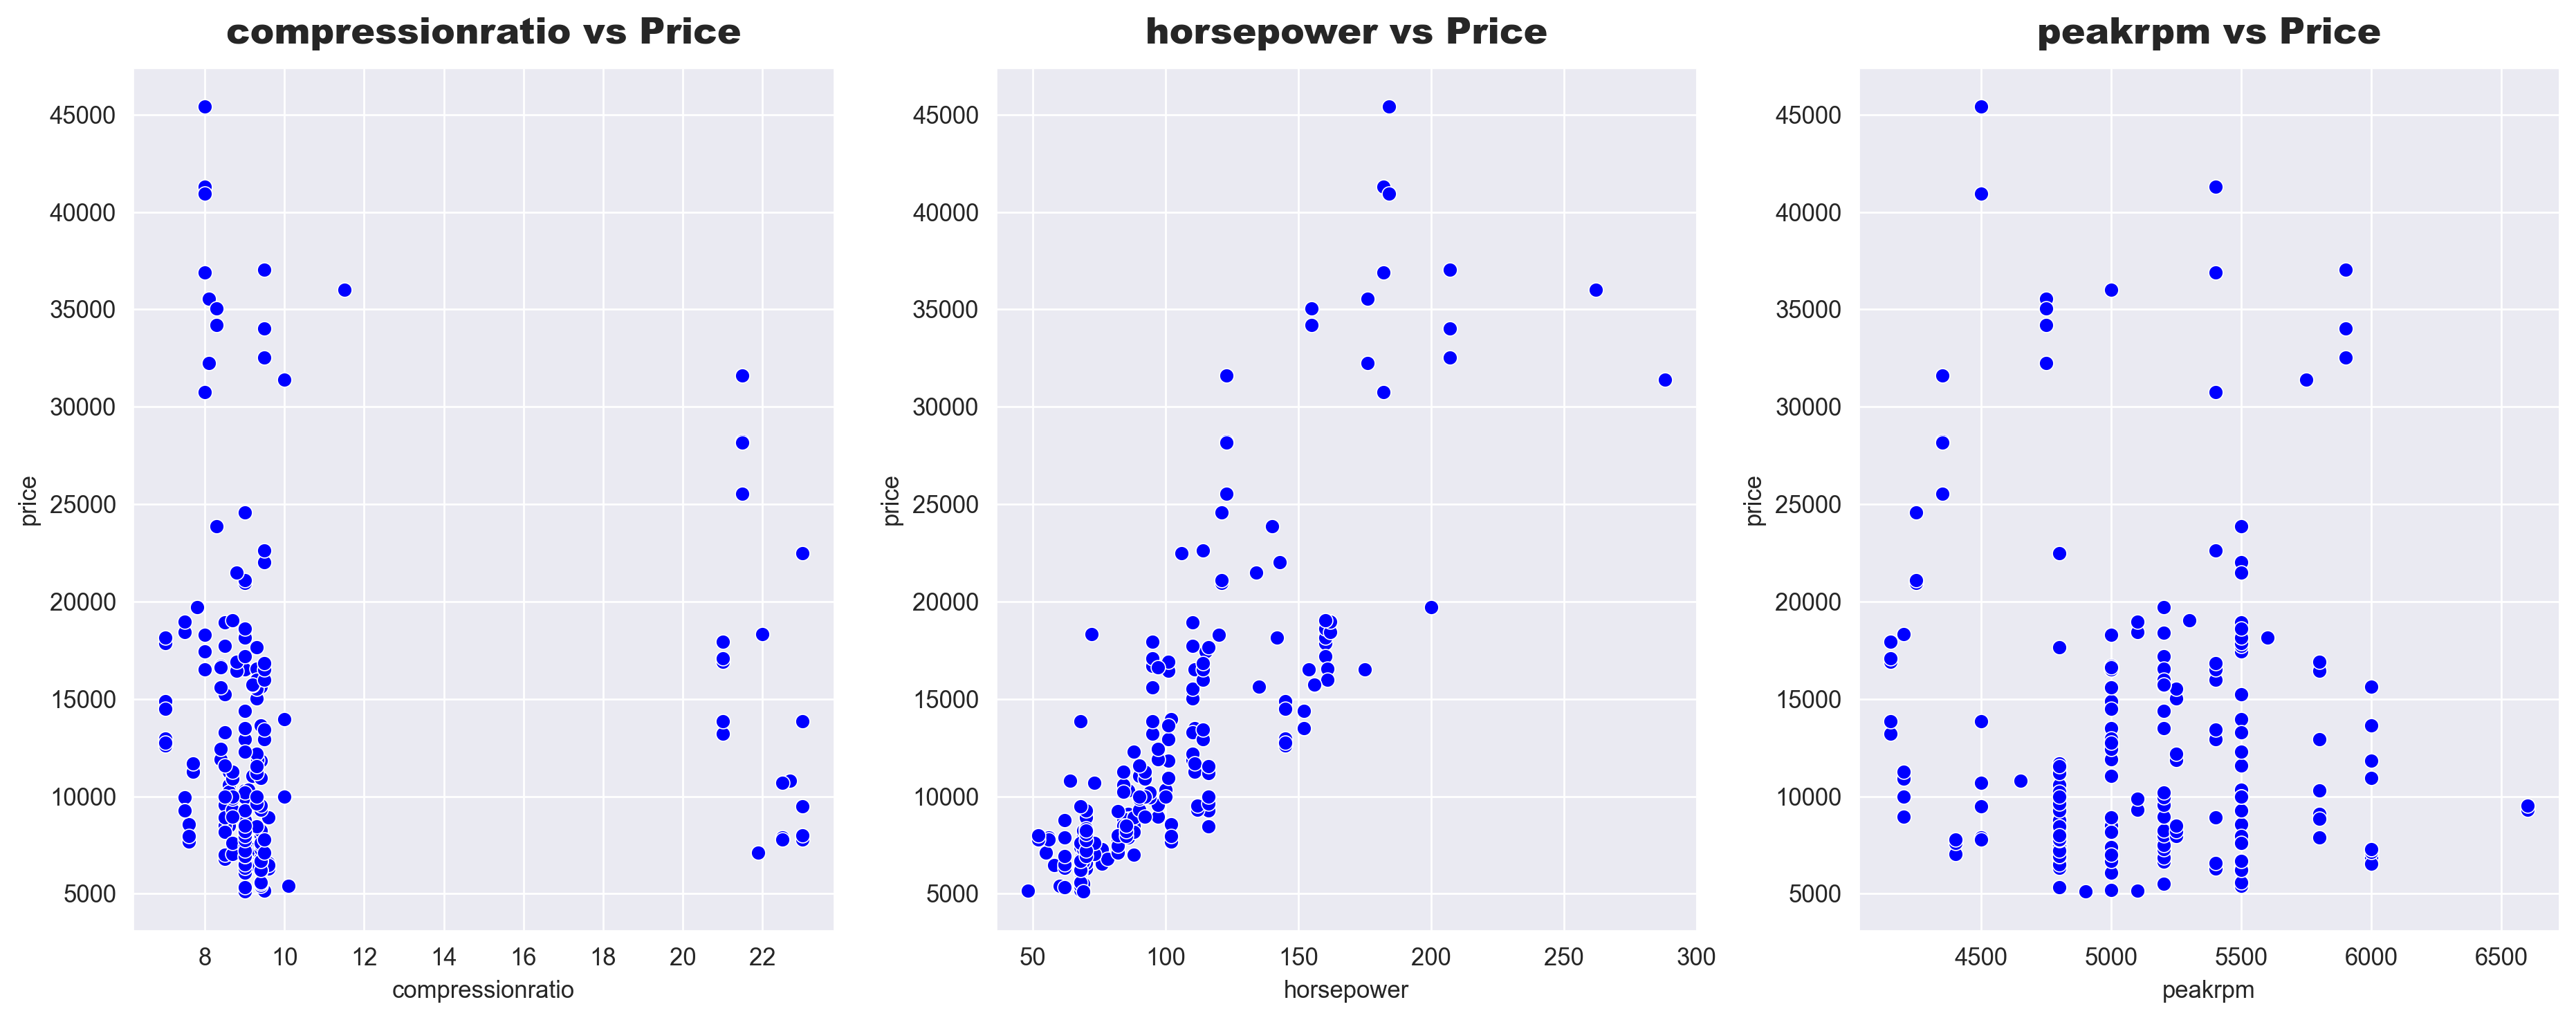

In [42]:
scatter_plot(['compressionratio', 'horsepower','peakrpm'])

1. HorsePower is highly correlated with Price. 
   So we can say with the increase in HorsePower the price of cars also increase.
2. From CompressionRatio and PeakRPM visuals we can't make any inference as the data-points are too scattered.

* Visualizing WheelBase, CurbWeight 

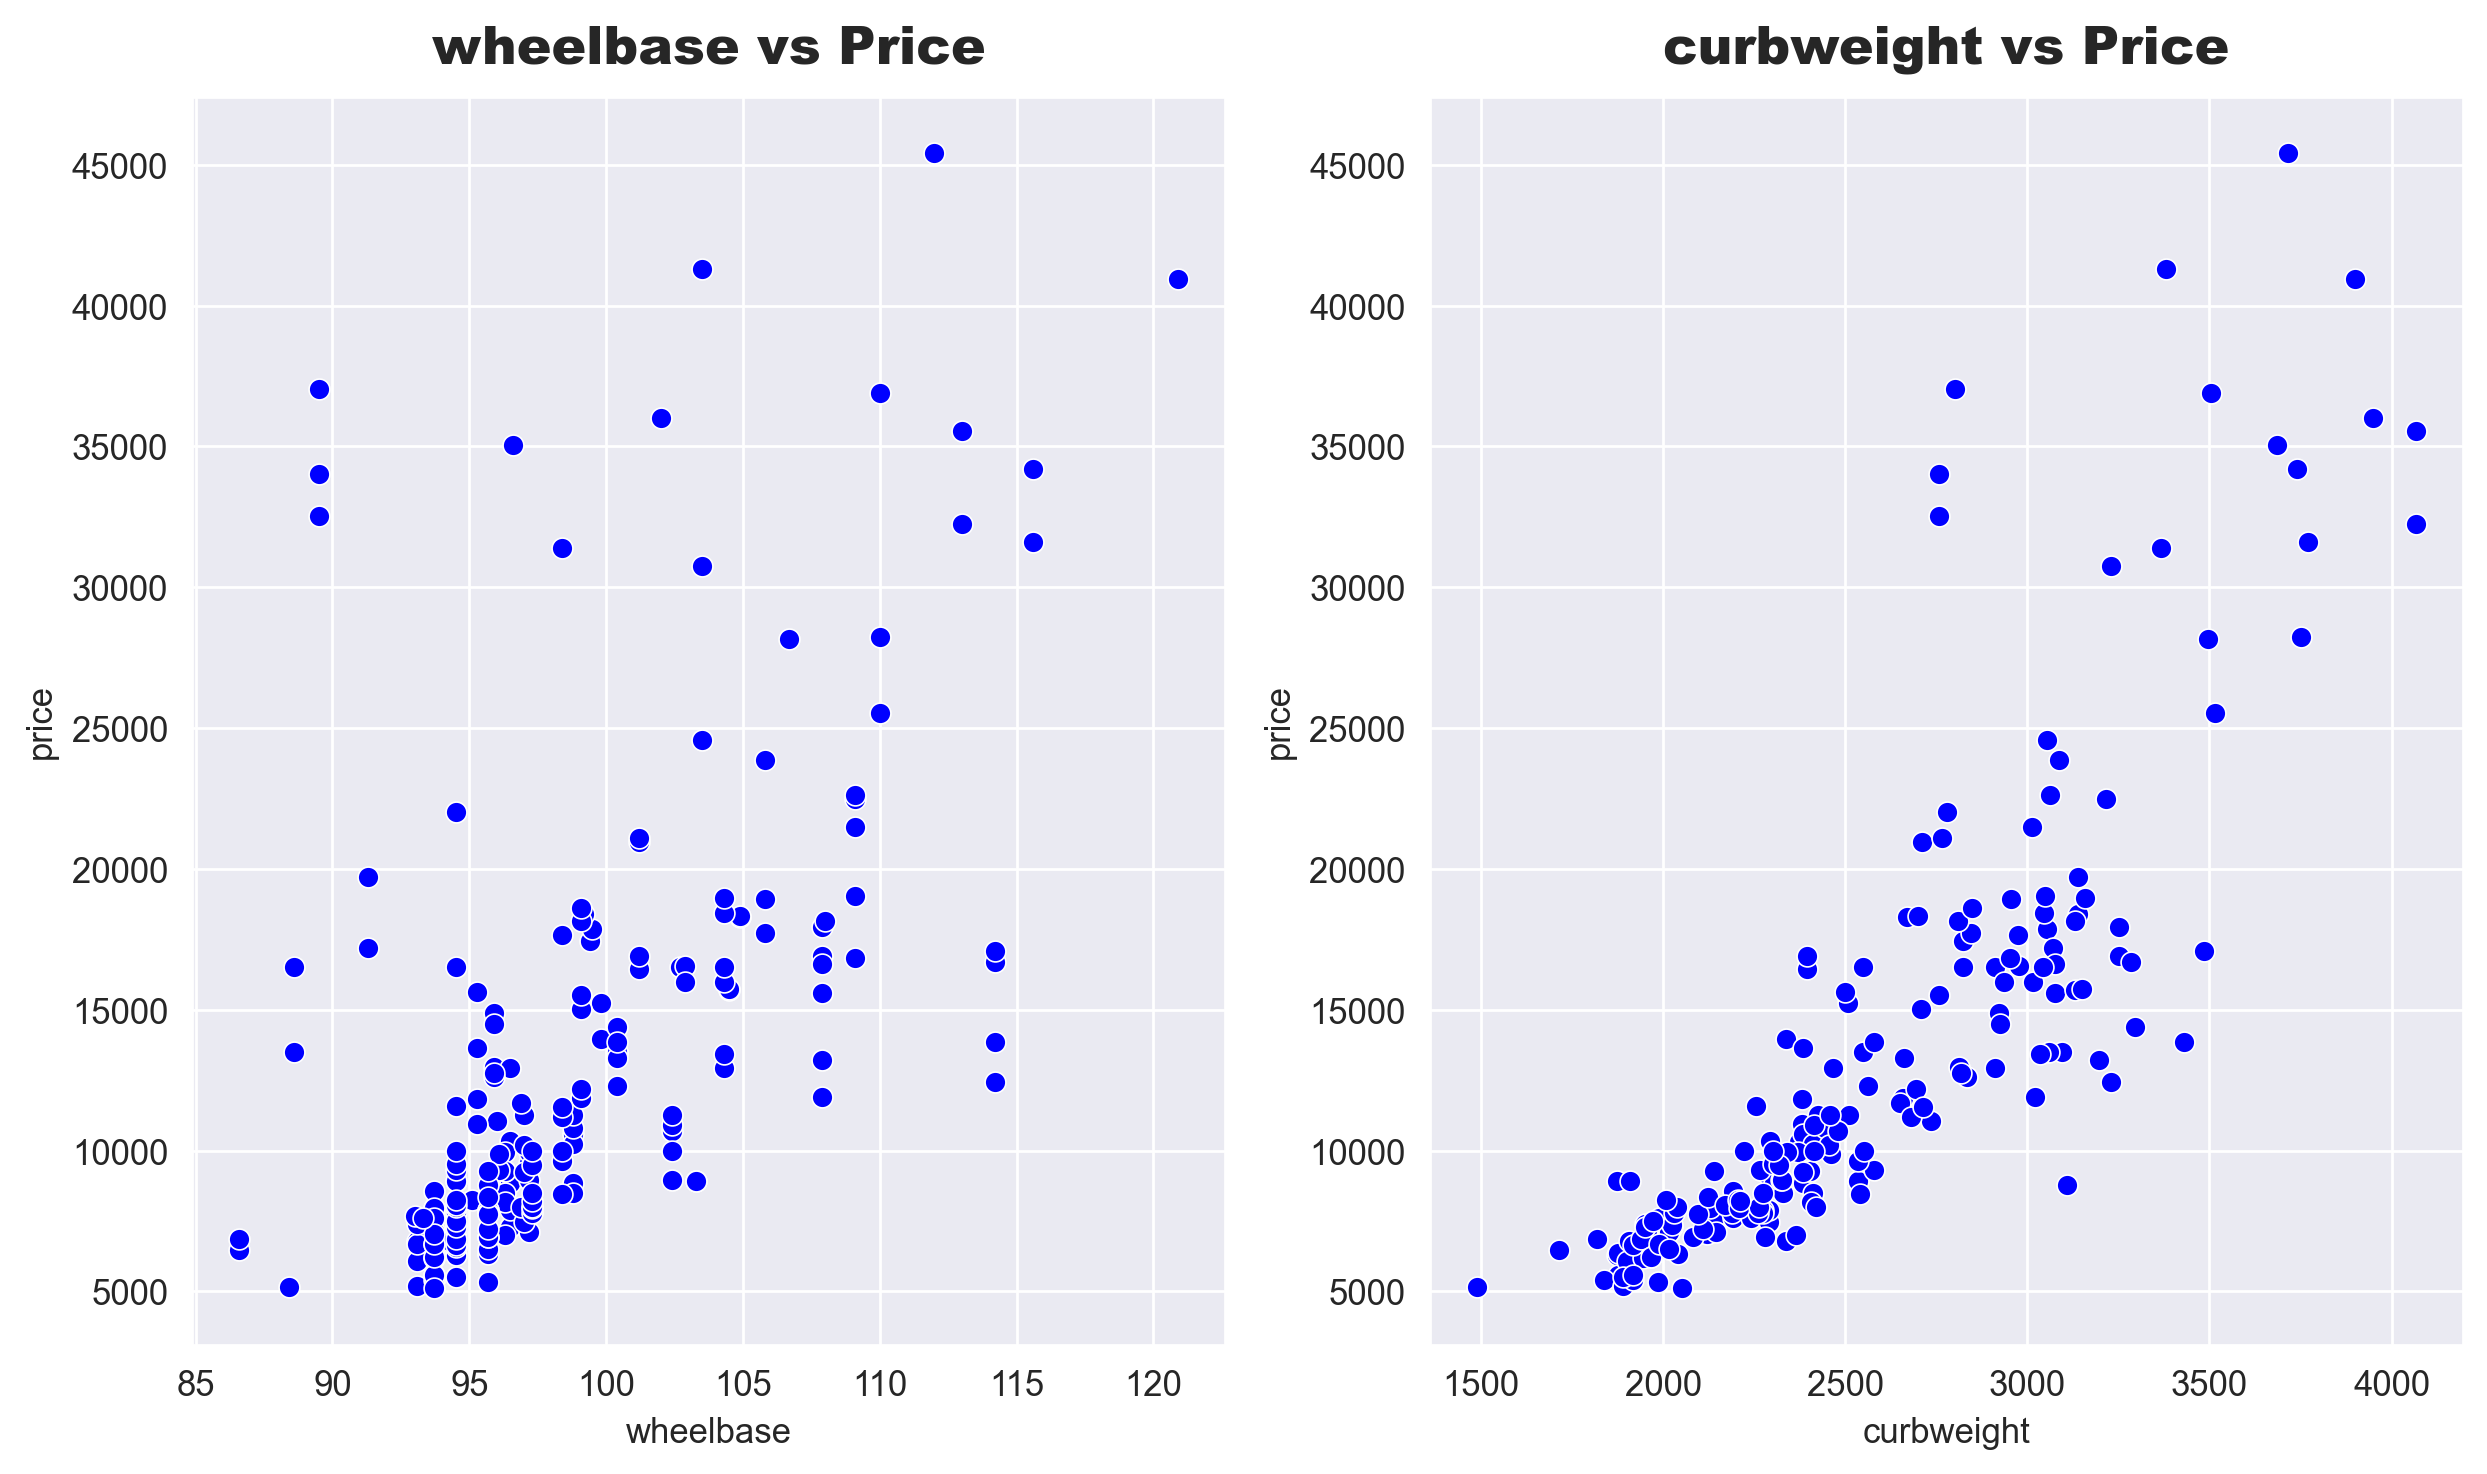

In [43]:
scatter_plot(['wheelbase','curbweight'])

1. CurbWeight is highly correllated with price. So we can say with increase in curbWeight the price of cars increases.
2. From wheelbase vs price, They are not highly correlated but still there is correlation. So the wheelBase the price of cars also increase.

* Visualizing City MPG and Highway MPG

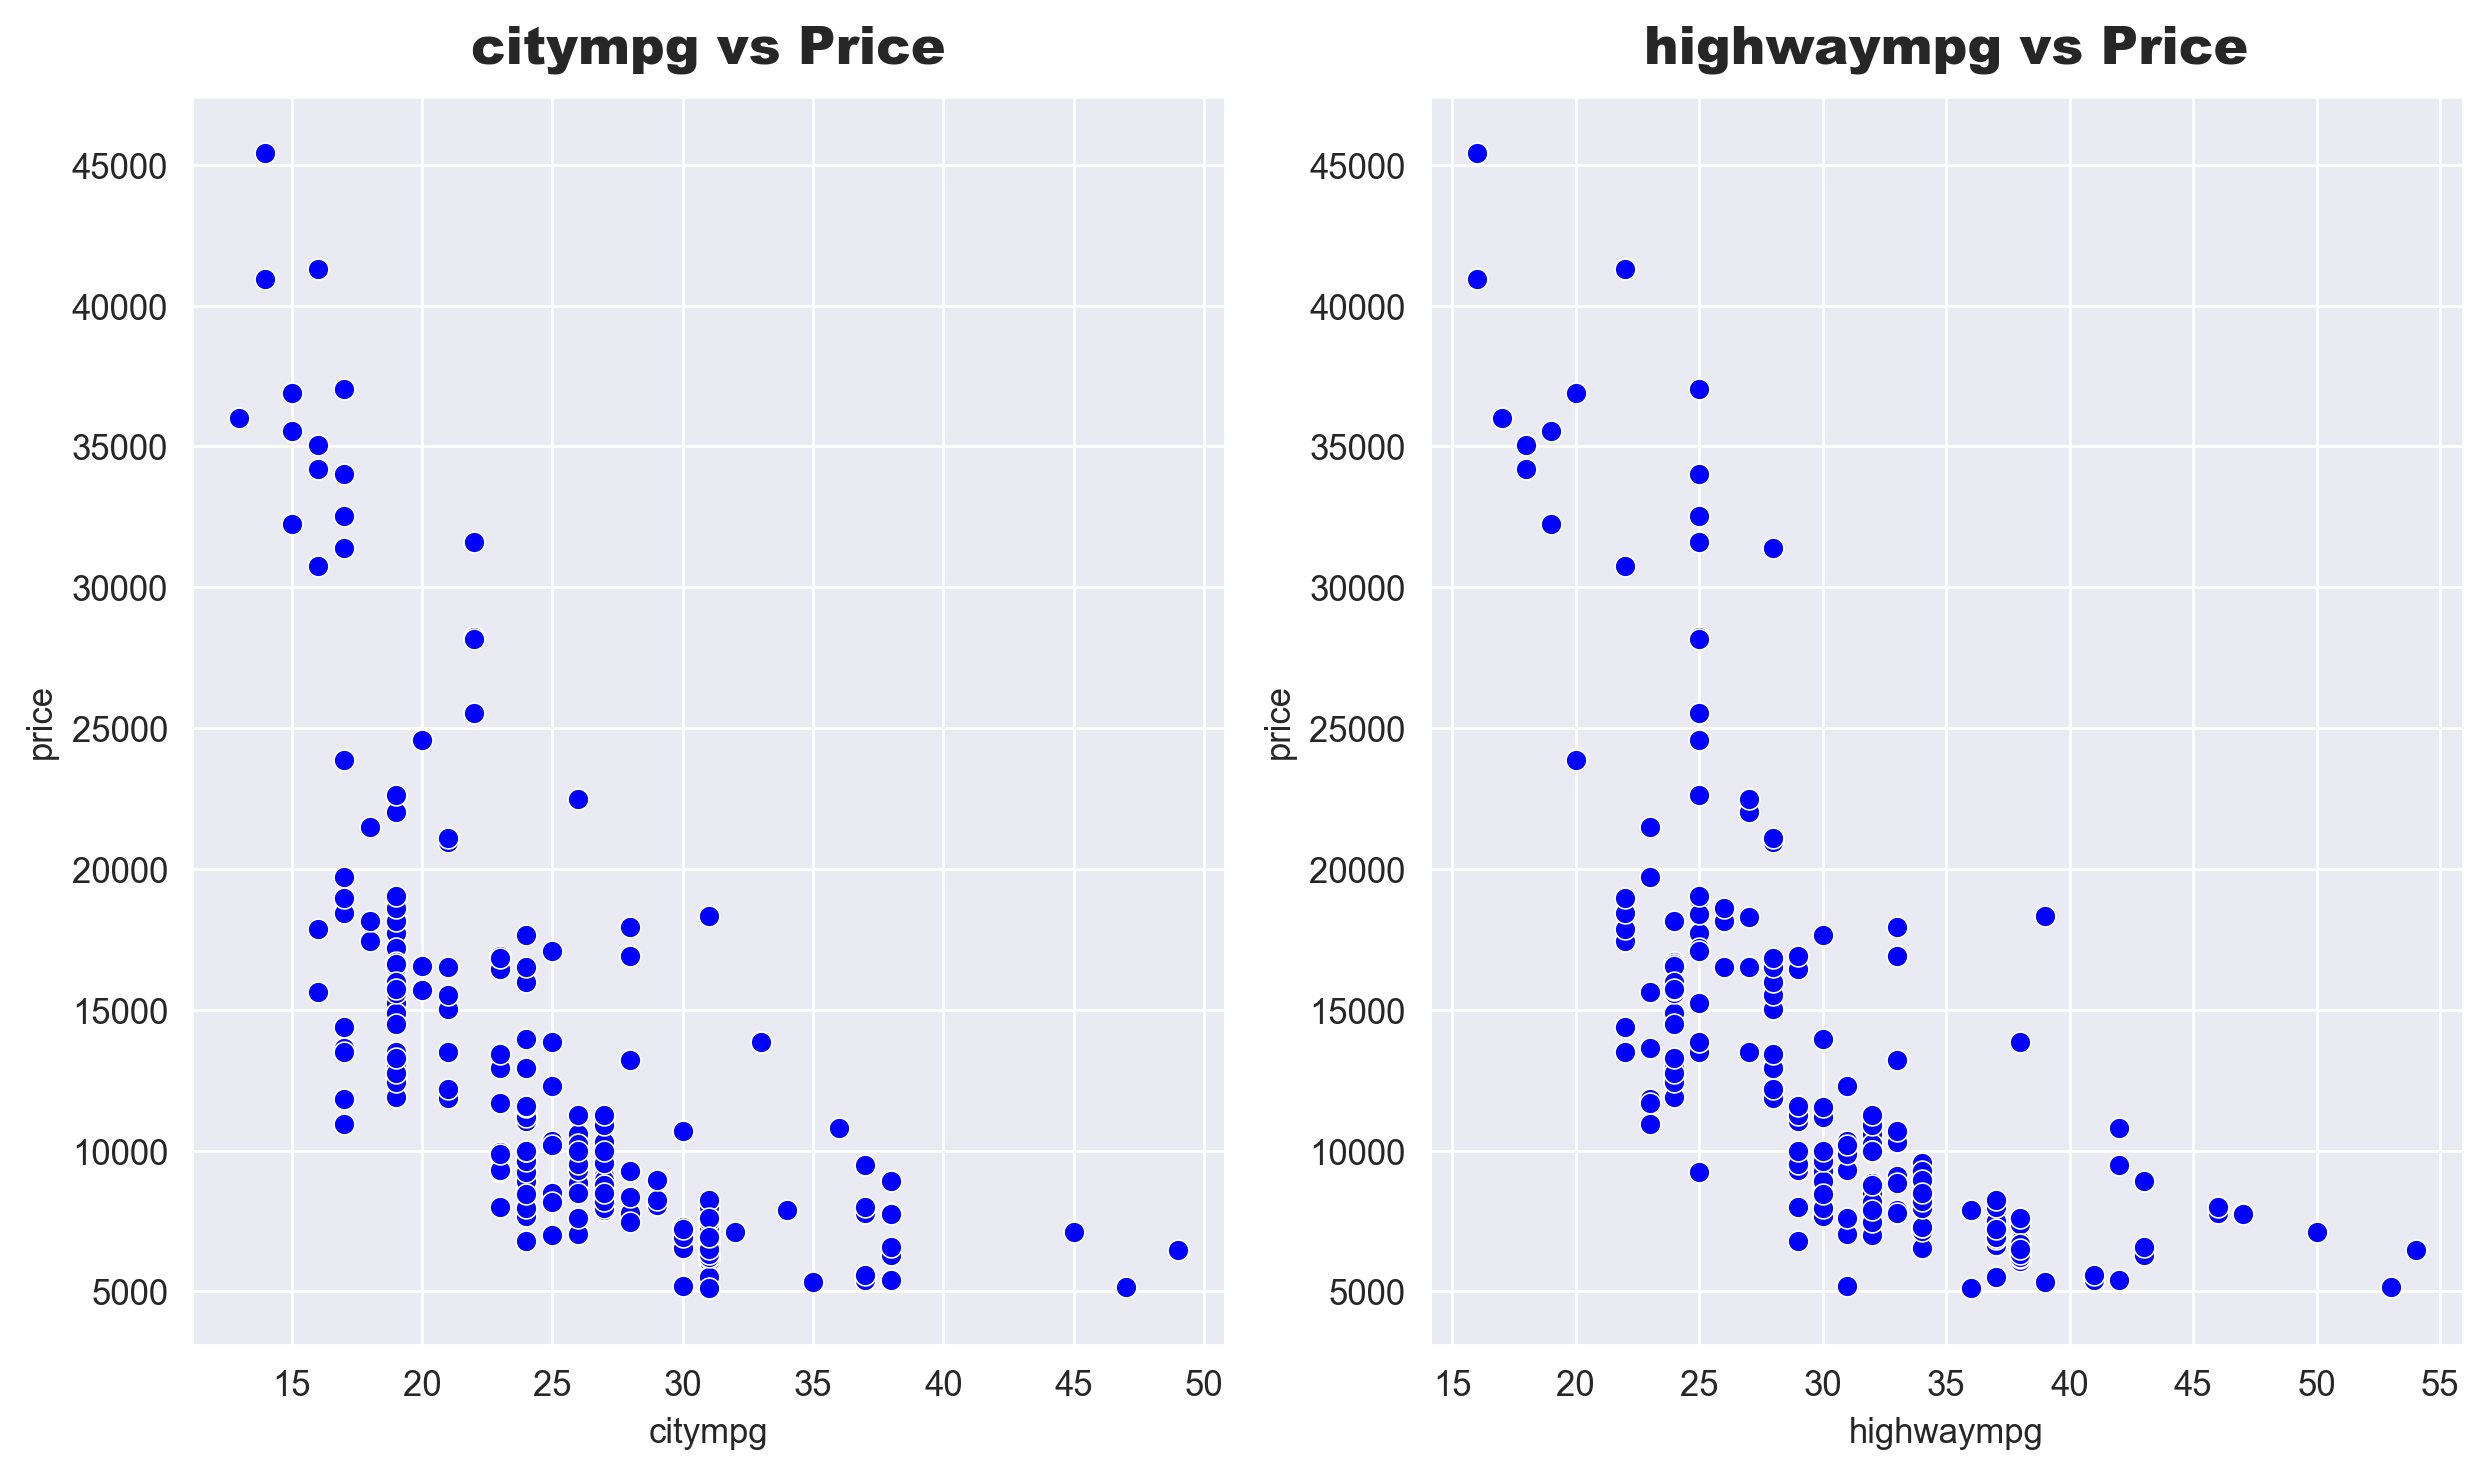

In [44]:
scatter_plot(['citympg','highwaympg'])

1. City mpg and Highway mpg are having negative correlation with price.
2. Increase in city mpg and highway mpg the price of the cars decreases.

 ## List of all the useful Features

* List of all the useful Categorical Features.

1. CompanyName

2. Fuel Type

3. Aspiration

4. Door Number

5. Car Body

6. Drive Wheel

7. Engine Type

8. Cyclinder Number

9. Fuel System

* List of all he useful Numerical Features.

1. Wheelbase

2. Carlength

3. Carwidth

4. Curbeweight

5. Enginesize

6. Boreratio

7. Horsepower

8. citympg

9. Highwaympg

## Feature Engineering

* As we made an insight above that we can split the car company name into different price ranges.Like Low Range, Medium Range, High Range cars.

In [45]:
z = round(df.groupby(["CompanyName"])['price'].agg(['mean']),2).T
z

CompanyName  alfa-romero      audi       bmw    buick  chevrolet    dodge  \
mean            15498.33  17859.17  26118.75  33647.0     6007.0  7875.44   

CompanyName    honda   isuzu   jaguar     mazda  ...    nissan   peugeot  \
mean         8184.69  8916.5  34600.0  10652.88  ...  10415.67  15489.09   

CompanyName  plymouth  porsche  renault      saab   subaru   toyota  \
mean          7963.43  31400.5   9595.0  15223.33  8541.25  9885.81   

CompanyName  volkswagen     volvo  
mean            10077.5  18063.18  

[1 rows x 22 columns]

* In above output we fetched the avergae price of each individual car companies
* Now we have to add this average values a new column in our datset.

In [46]:
df = df.merge(z.T, how = 'left', on = 'CompanyName')

In [47]:
bins = [0, 1000, 20000, 40000]
cars_bin = ['Budget', 'Medium', 'Highend']
df['CarRange'] = pd.cut(df['mean'], bins, right=False, labels = cars_bin)
df.head()

symboling  CompanyName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  ...  boreratio  stroke  \
0        rwd          front       88.6      168.8  ...       3.47    2.68   
1        rwd          front       88.6      168.8  ...       3.47    2.68   
2        rwd          front       94.5      171.2  ...       2.68    3.47   
3        fwd          front       99.8      176.6  ...       3.19    3.40   
4        4wd          front       99.4      176.6  ...       3.19    3.40   

   compressionratio horsepower peakrpm  citympg highwaympg    price      mean  \
0               9.0        111    5000       21         27  13495.0  15498.33   
1               9.0        111    5000       21         27  16500.0  15498.33   
2               9.0        154    5000       19         26  16500.0  15498.33   
3              10.0        102    5500       24         30  13950.0  17859.17   
4               8.0        115    5500       18         22  17450.0  17859.17   

   CarRange  
0    Medium  
1    Medium  
2    Medium  
3    Medium  
4    Medium  

[5 rows x 27 columns]

## Data preprocessing

In [48]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarRange']]

In [49]:
new_df.head()

fueltype aspiration doornumber      carbody drivewheel enginetype  \
0      gas        std        two  convertible        rwd       dohc   
1      gas        std        two  convertible        rwd       dohc   
2      gas        std        two    hatchback        rwd       ohcv   
3      gas        std       four        sedan        fwd        ohc   
4      gas        std       four        sedan        4wd        ohc   

  cylindernumber fuelsystem  wheelbase  carlength  carwidth  curbweight  \
0           four       mpfi       88.6      168.8      64.1        2548   
1           four       mpfi       88.6      168.8      64.1        2548   
2            six       mpfi       94.5      171.2      65.5        2823   
3           four       mpfi       99.8      176.6      66.2        2337   
4           five       mpfi       99.4      176.6      66.4        2824   

   enginesize  boreratio  horsepower  citympg  highwaympg    price CarRange  
0         130       3.47         111       21          27  13495.0   Medium  
1         130       3.47         111       21          27  16500.0   Medium  
2         152       2.68         154       19          26  16500.0   Medium  
3         109       3.19         102       24          30  13950.0   Medium  
4         136       3.19         115       18          22  17450.0   Medium

* Create Dummy Variables for all the Categorical Features

In [50]:
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarRange"],data=new_df)

In [51]:
new_df.head()

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0       88.6      168.8      64.1        2548         130       3.47   
1       88.6      168.8      64.1        2548         130       3.47   
2       94.5      171.2      65.5        2823         152       2.68   
3       99.8      176.6      66.2        2337         109       3.19   
4       99.4      176.6      66.4        2824         136       3.19   

   horsepower  citympg  highwaympg    price  ...  fuelsystem_2bbl  \
0         111       21          27  13495.0  ...                0   
1         111       21          27  16500.0  ...                0   
2         154       19          26  16500.0  ...                0   
3         102       24          30  13950.0  ...                0   
4         115       18          22  17450.0  ...                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  CarRange_Budget  CarRange_Medium  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   CarRange_Highend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 49 columns]

In [52]:
new_df.replace(False,0, inplace = True)

In [53]:
new_df.head()

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0       88.6      168.8      64.1        2548         130       3.47   
1       88.6      168.8      64.1        2548         130       3.47   
2       94.5      171.2      65.5        2823         152       2.68   
3       99.8      176.6      66.2        2337         109       3.19   
4       99.4      176.6      66.4        2824         136       3.19   

   horsepower  citympg  highwaympg    price  ...  fuelsystem_2bbl  \
0         111       21          27  13495.0  ...                0   
1         111       21          27  16500.0  ...                0   
2         154       19          26  16500.0  ...                0   
3         102       24          30  13950.0  ...                0   
4         115       18          22  17450.0  ...                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  CarRange_Budget  CarRange_Medium  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   CarRange_Highend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 49 columns]

* Feature Scaling of Numerical Data

In [54]:
scaler = StandardScaler()

In [55]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [56]:
new_df.head()

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0  -1.690772  -0.426521 -0.844782   -0.014566    0.074449   0.519071   
1  -1.690772  -0.426521 -0.844782   -0.014566    0.074449   0.519071   
2  -0.708596  -0.231513 -0.190566    0.514882    0.604046  -2.404880   
3   0.173698   0.207256  0.136542   -0.420797   -0.431076  -0.517266   
4   0.107110   0.207256  0.230001    0.516807    0.218885  -0.517266   

   horsepower   citympg  highwaympg    price  ...  fuelsystem_2bbl  \
0    0.174483 -0.646553   -0.546059  13495.0  ...                0   
1    0.174483 -0.646553   -0.546059  16500.0  ...                0   
2    1.264536 -0.953012   -0.691627  16500.0  ...                0   
3   -0.053668 -0.186865   -0.109354  13950.0  ...                0   
4    0.275883 -1.106241   -1.273900  17450.0  ...                0   

   fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  \
0                0               0               0                1   
1                0               0               0                1   
2                0               0               0                1   
3                0               0               0                1   
4                0               0               0                1   

   fuelsystem_spdi  fuelsystem_spfi  CarRange_Budget  CarRange_Medium  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   CarRange_Highend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 49 columns]

In [57]:
x = new_df.drop(columns = ['price'])
y = new_df['price']

In [58]:
[x.shape, y.shape]

[(205, 48), (205,)]

* Splitting Data into Traning & Testing.

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
print("xtrain - >  ",xtrain.shape)
print("xtest - >  ",xtest.shape)
print("ytrain - >  ",ytrain.shape)
print("ytest - >  ",ytest.shape)

xtrain - >   (164, 48)
xtest - >   (41, 48)
ytrain - >   (164,)
ytest - >   (41,)


## Model Building

In [61]:
training_score = []
testing_score = []

In [62]:
# procedure to run different models
def prediction(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    Train_Accuracy = model.score(xtrain,ytrain) *100
    Test_Accuracy = model.score(xtest,ytest) *100
    
    training_score.append(Train_Accuracy)
    testing_score.append(Test_Accuracy)
    
    print(f'{model} model Train Accuracy : {Train_Accuracy : .2f}%')
    print(f'{model} model Test Accuracy : {Test_Accuracy : .2f}%')

In [63]:
prediction(LinearRegression())

LinearRegression() model Train Accuracy :  95.50%
LinearRegression() model Test Accuracy :  88.32%


In [64]:
prediction(DecisionTreeRegressor())

DecisionTreeRegressor() model Train Accuracy :  99.87%
DecisionTreeRegressor() model Test Accuracy :  88.29%


In [65]:
prediction(RandomForestRegressor())

RandomForestRegressor() model Train Accuracy :  98.79%
RandomForestRegressor() model Test Accuracy :  95.14%


In [66]:
prediction(AdaBoostRegressor())

AdaBoostRegressor() model Train Accuracy :  96.02%
AdaBoostRegressor() model Test Accuracy :  91.87%


In [67]:
prediction(GradientBoostingRegressor())

GradientBoostingRegressor() model Train Accuracy :  99.30%
GradientBoostingRegressor() model Test Accuracy :  91.92%


In [68]:
prediction(XGBRegressor())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model Train Accuracy :  99.87%
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categ

In [69]:
training_score, testing_score

([95.50453759020766,
  99.86537119069865,
  98.7872850740928,
  96.01805679927277,
  99.30453485287886,
  99.86530600652986],
 [88.32387373820943,
  88.28914637856113,
  95.14000366803795,
  91.8667324426312,
  91.91880391783162,
  93.17522007122963])

In [70]:
models = ['Linear Regression','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XGBoost']

In [71]:
df = pd.DataFrame({'Algorithms': models,
                  'Training Score' : training_score,
                  'Testing Score' : testing_score})

In [72]:
df

Algorithms  Training Score  Testing Score
0  Linear Regression       95.504538      88.323874
1      Decision Tree       99.865371      88.289146
2      Random Forest       98.787285      95.140004
3          Ada Boost       96.018057      91.866732
4     Gradient Boost       99.304535      91.918804
5            XGBoost       99.865306      93.175220

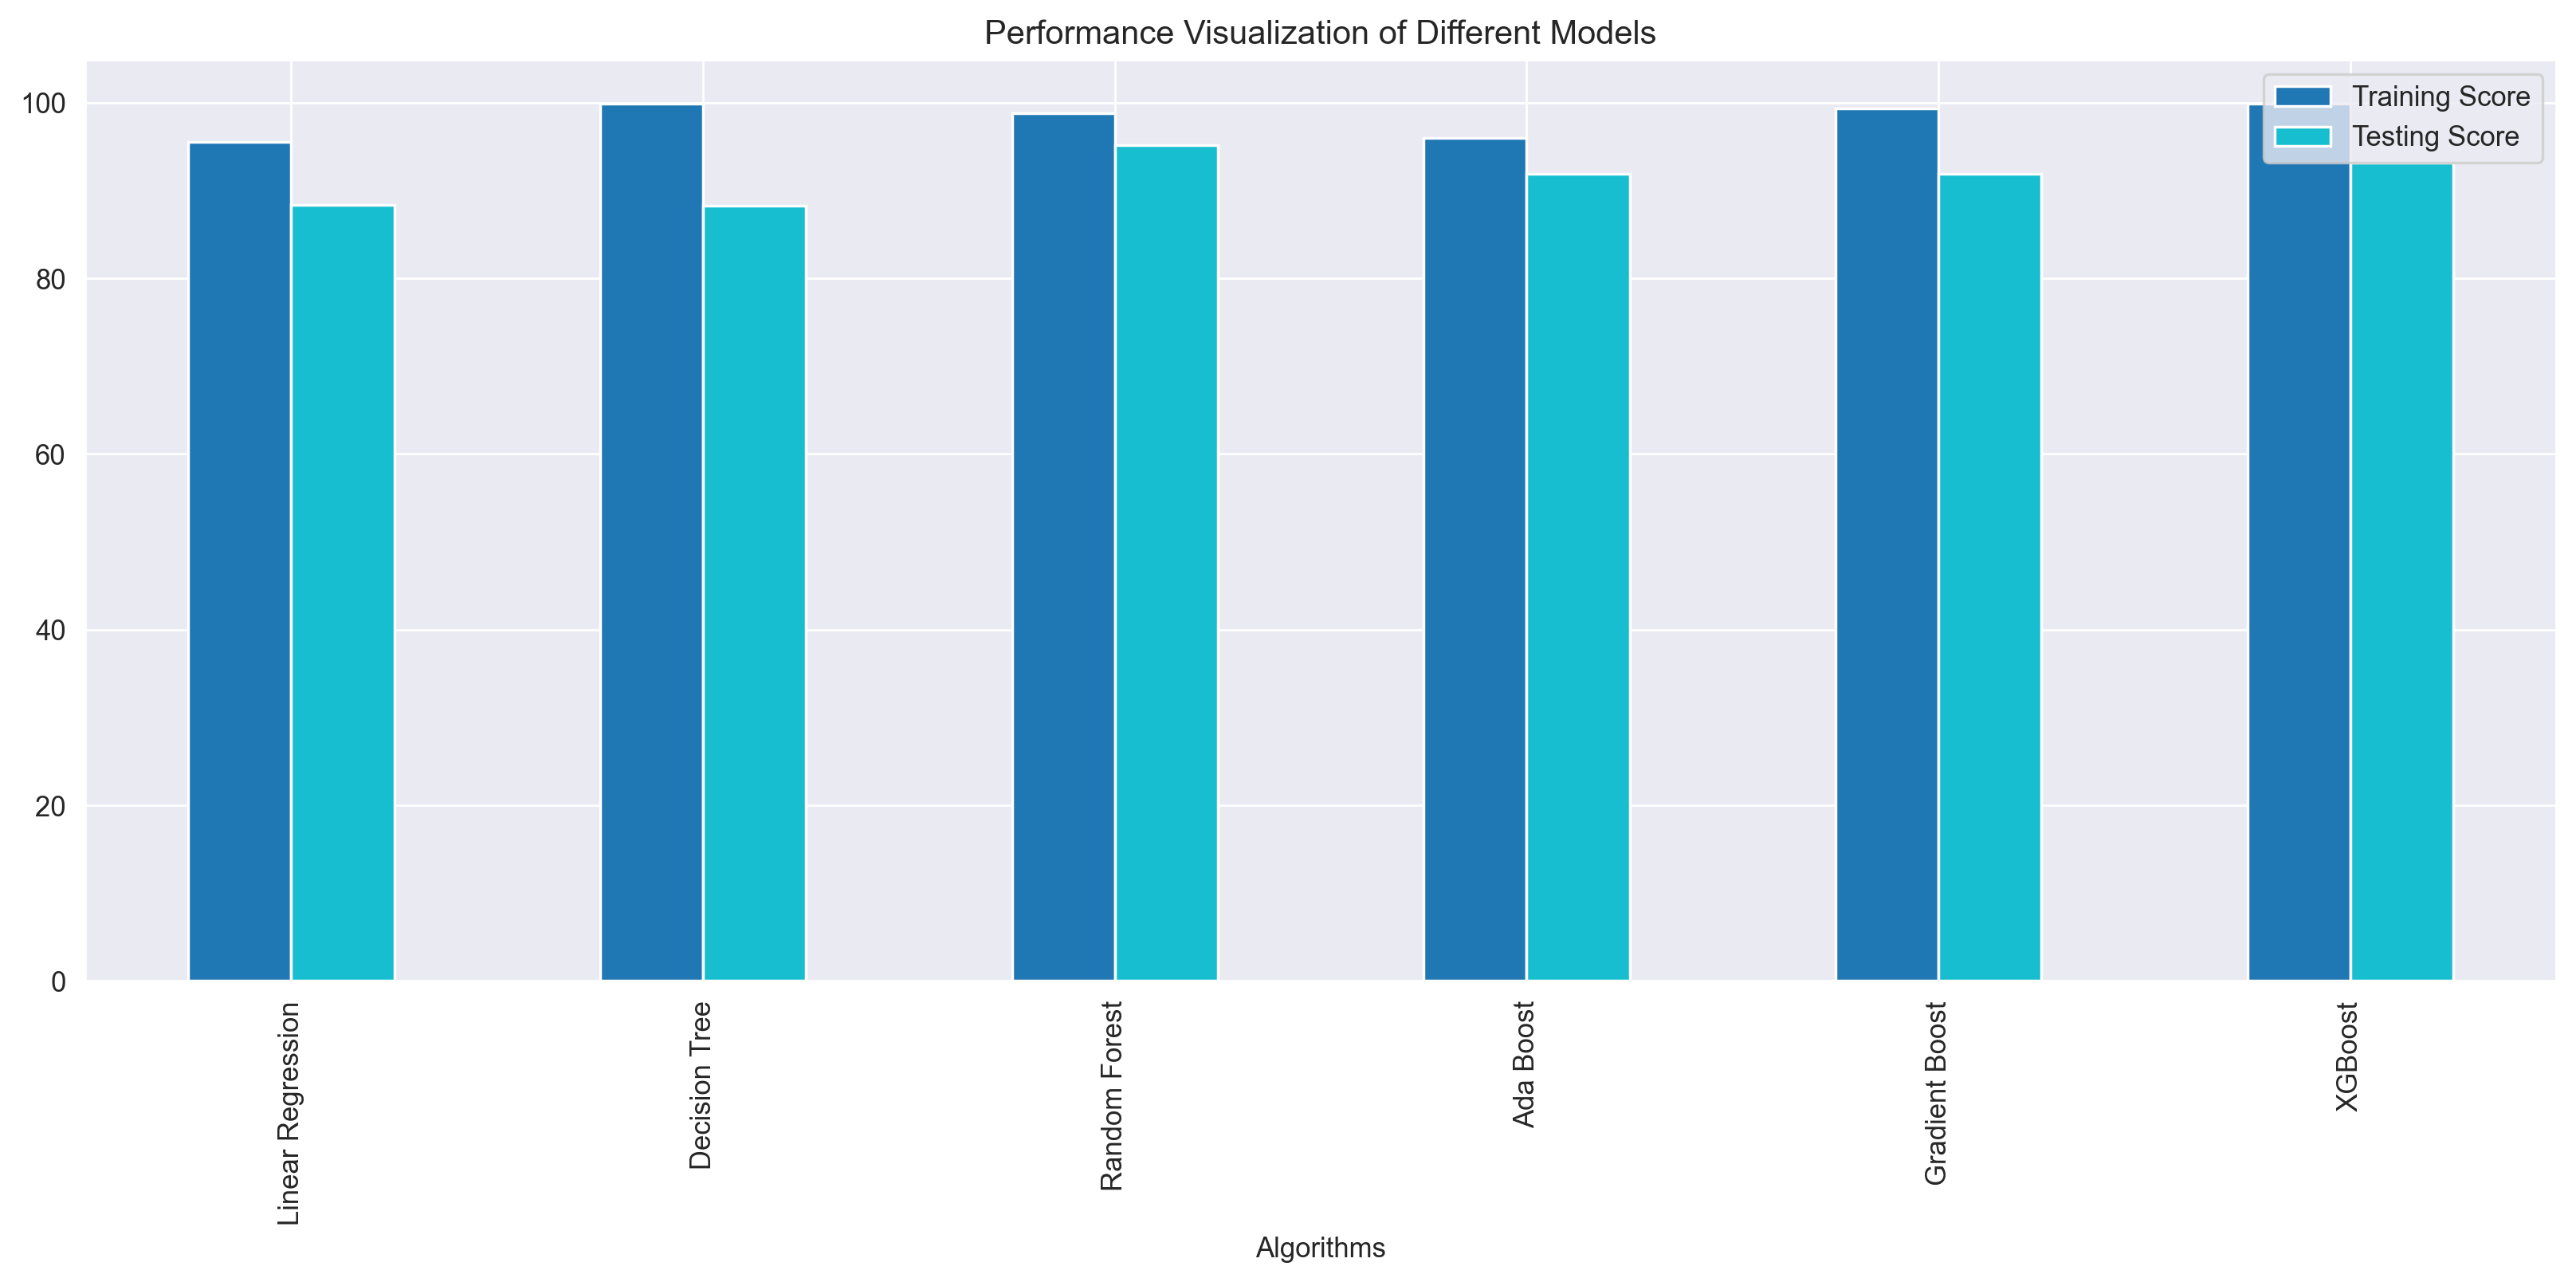

In [73]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="tab10")
plt.show()


## Observation
* Highest performance was give by Random Forest Model around 95%.

* But XGBoost Model performance was also good.

* So we can use any of these two Models for predicting the price of car in future.

## Conclusion

Car Price Prediction with Machine Learning.

Key-Points
* First did the Basic Understanding of Data

* Performed Data Cleaning to make the raw data more useable while analysis.

* Performed Exploratory Data Analysis to generate insights from the data.

* Performed Data Preprocessing to make data suitable for model training & testing.

* Then trainined the model using different Machine Learning Algorithms.

* In the end came with 95% accuracy which was given by RandomForestRegression.So we can use this model for predicting price of a car in future.